In [301]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [302]:
df = pd.read_csv('train.csv')

Missing value: Finding the percentage

In [303]:
feature_with_nan=[feature for feature in df.columns if df[feature].isnull().sum() > 0]
for feature in feature_with_nan:
    print(f"{feature}: {np.round(df[feature].isnull().mean(), 4)}% missing values.")

LotFrontage: 0.1774% missing values.
Alley: 0.9377% missing values.
MasVnrType: 0.0055% missing values.
MasVnrArea: 0.0055% missing values.
BsmtQual: 0.0253% missing values.
BsmtCond: 0.0253% missing values.
BsmtExposure: 0.026% missing values.
BsmtFinType1: 0.0253% missing values.
BsmtFinType2: 0.026% missing values.
Electrical: 0.0007% missing values.
FireplaceQu: 0.4726% missing values.
GarageType: 0.0555% missing values.
GarageYrBlt: 0.0555% missing values.
GarageFinish: 0.0555% missing values.
GarageQual: 0.0555% missing values.
GarageCond: 0.0555% missing values.
PoolQC: 0.9952% missing values.
Fence: 0.8075% missing values.
MiscFeature: 0.963% missing values.


Finding if there is a relation between the mising value and the dependent feature 'SalePrice'

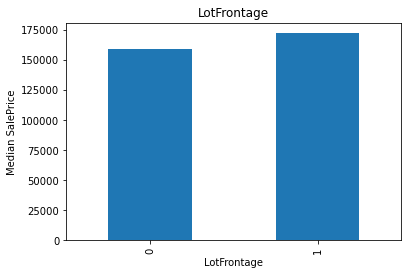

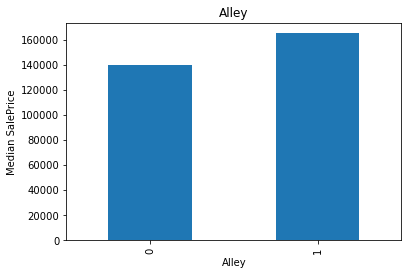

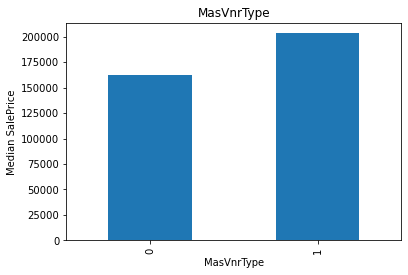

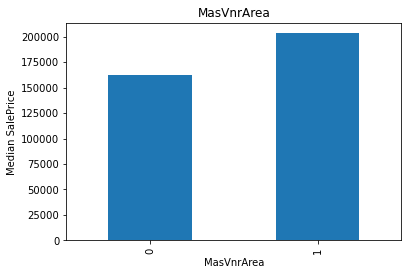

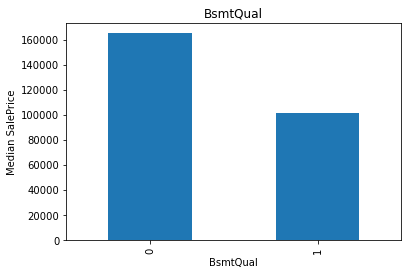

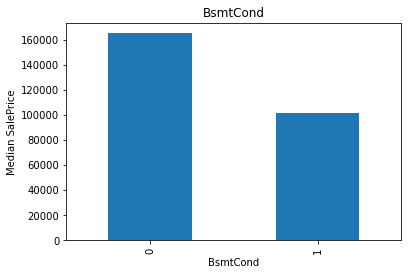

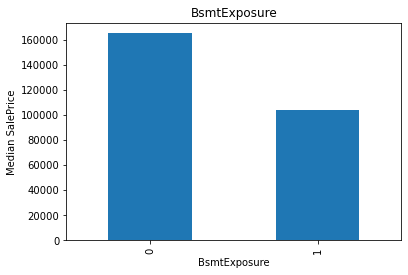

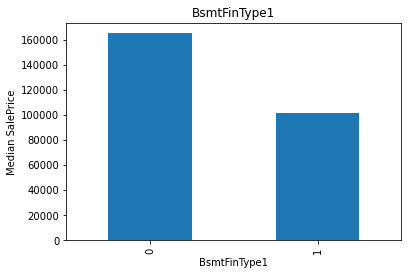

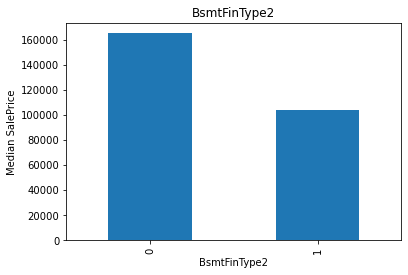

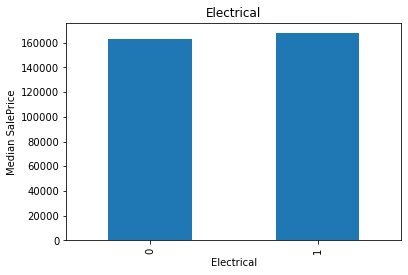

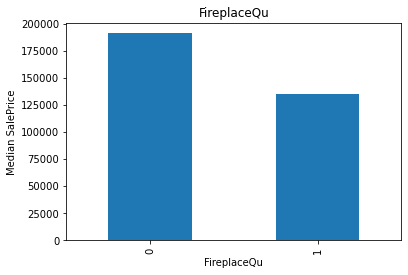

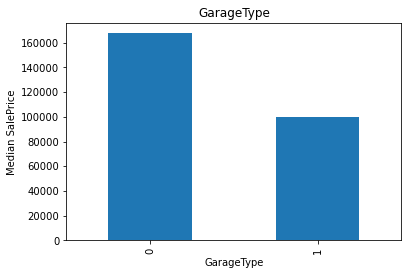

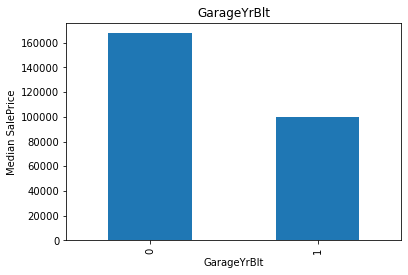

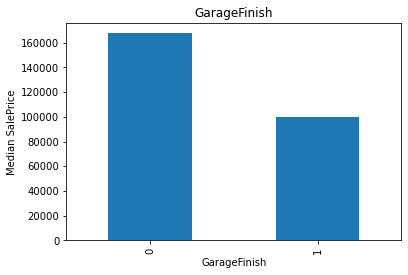

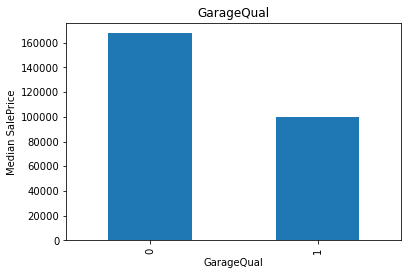

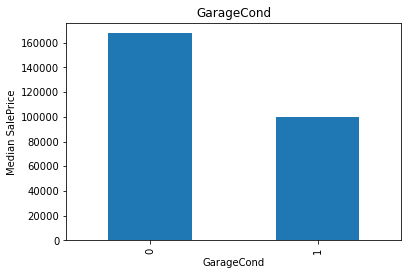

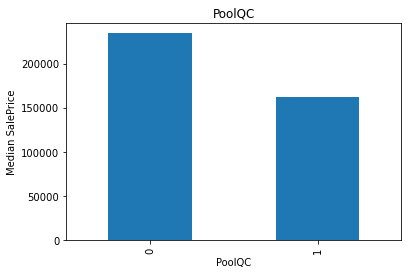

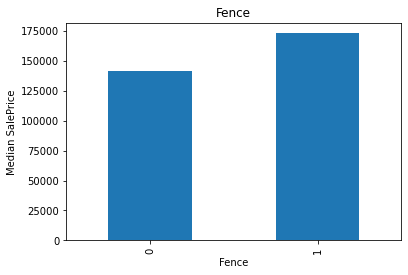

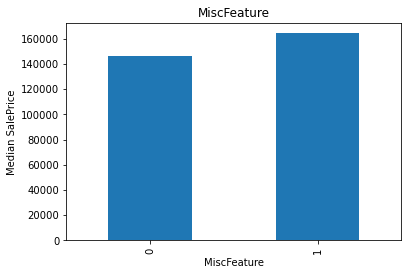

In [304]:
for feature in feature_with_nan:
    data = df.copy()
    # Replcaing all the nan values with 1, and replacing all the non nan values with 0
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # Plotting the graph between the independent features and the dependent feature
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.title(feature)
    plt.ylabel('Median SalePrice')
    plt.show()

The missing values are important for the prediction of the dependent feature 'SalePrice'. Thus the missing values should be replaced with some meaningful value.

In [305]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Handling all the numerical features

In [306]:
numerical_feature=[feature for feature in df.columns if df[feature].dtype != 'O']
print(f"The total number of numerical features are: {len(numerical_feature)}")

The total number of numerical features are: 38


In [307]:
print(numerical_feature)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [308]:
# Removing the Id Column, since it is not related to the dependent feature
numerical_feature = numerical_feature[1:]

In [309]:
print(numerical_feature)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


Handling the temporal feature

In [310]:
year_feature=[feature for feature in numerical_feature if 'Yr' in feature or 'Year' in feature]
print(f"The year features are: {year_feature}")

The year features are: ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


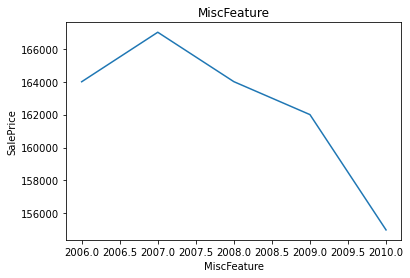

In [311]:
# Plotting the graph between the independent feature 'YrSold' and the dependent feature 'SalePrice'
df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel(feature)
plt.ylabel('SalePrice')
plt.title(feature)
plt.show()

Plotting the graph between all the year feature and the dependent feature 'SalePrice'

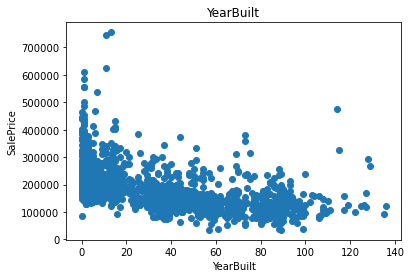

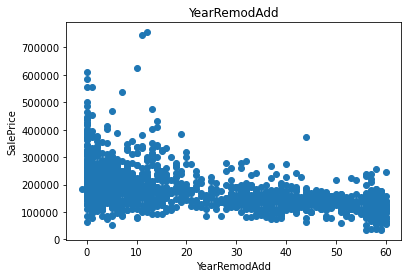

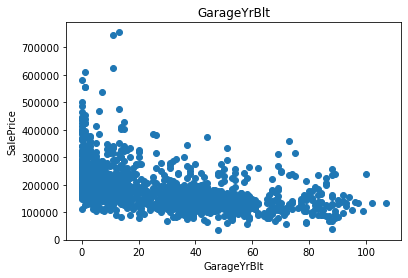

In [312]:
for feature in year_feature:
    if feature != 'YrSold':
        data = df.copy()
        
        # Updating the value of the year feature
        data[feature] = data['YrSold'] - data[feature]
        
        # Plotting the graph
        plt.scatter(data[feature], data['SalePrice'])
        plt.title(feature)
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

From the above graph the cost of the plot decreases every year since the plot is old.

#### Discrete Feature

In [313]:
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique()) < 25 and feature not in year_feature]

In [314]:
print(f"The total number of discrete features are: {len(discrete_feature)}")

The total number of discrete features are: 17


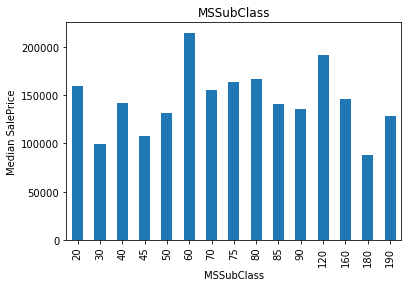

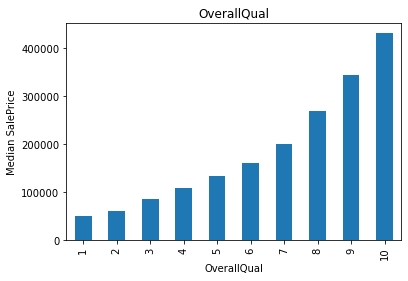

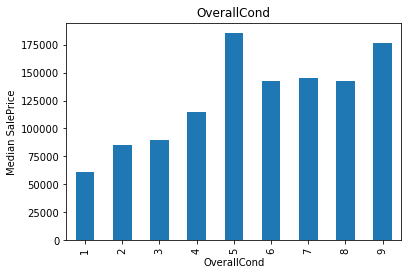

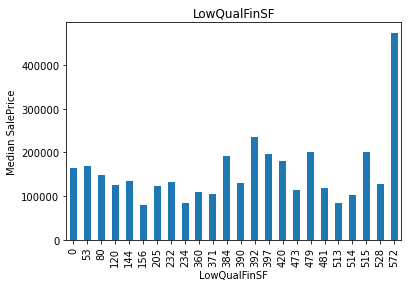

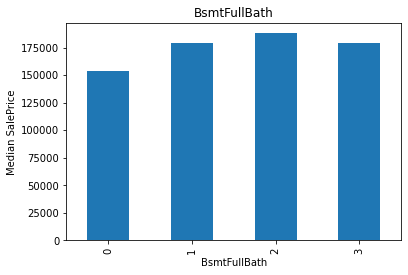

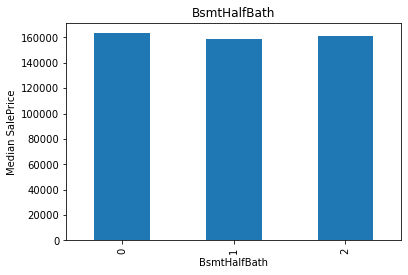

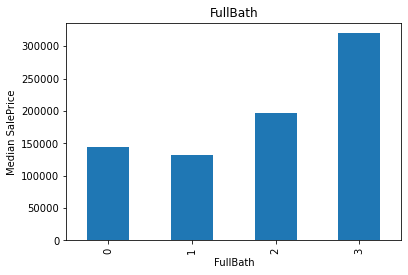

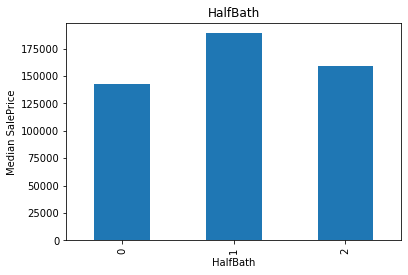

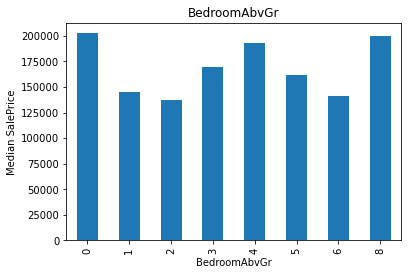

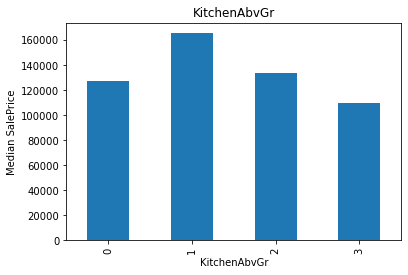

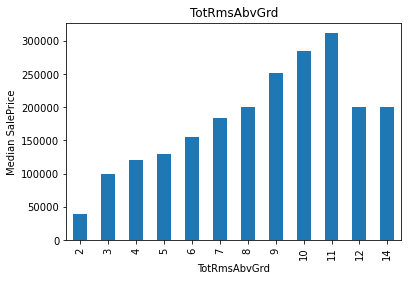

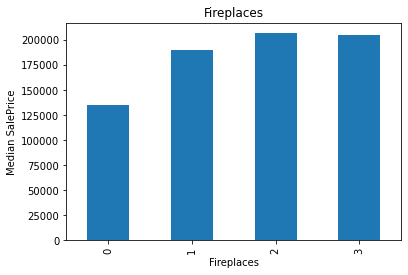

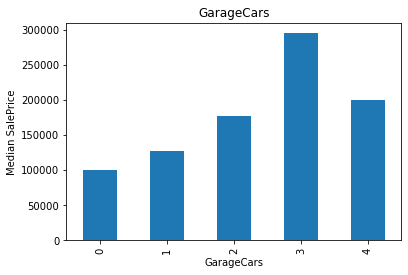

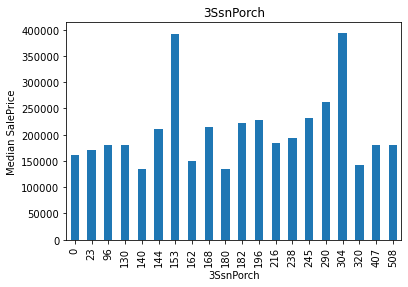

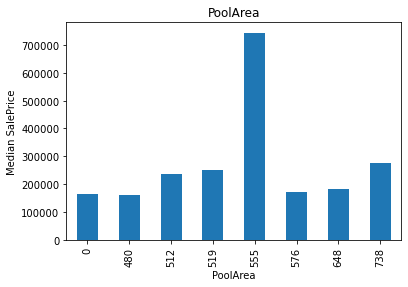

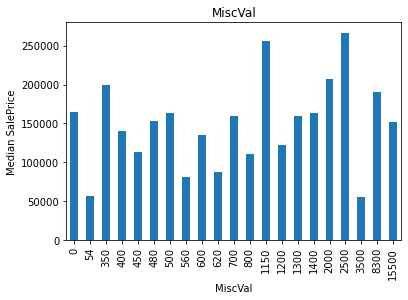

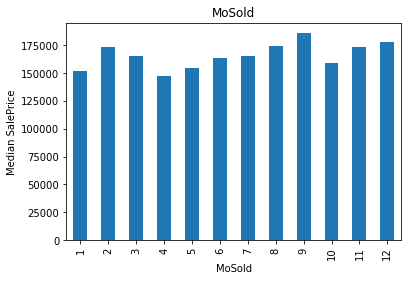

In [315]:
# Plotting the graph between the independent feature (discrete_feature) and dependent feature (SalePrice)
for feature in discrete_feature:
    data = df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Median SalePrice')
    plt.show()

#### Handling the continous features

In [316]:
continous_feature=[feature for feature in numerical_feature if feature not in discrete_feature and feature not in year_feature]

In [317]:
print(f"The total number of continous features are: {len(continous_feature)}")

The total number of continous features are: 16


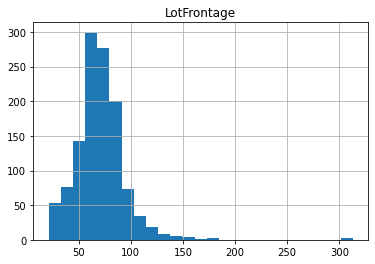

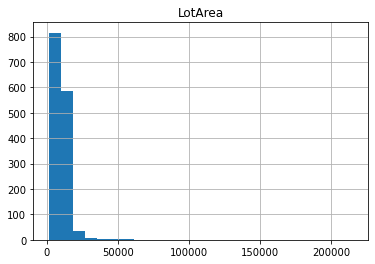

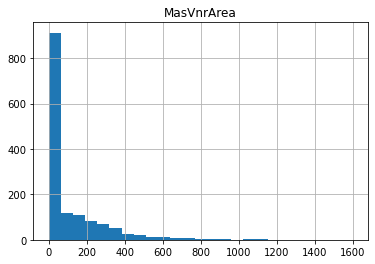

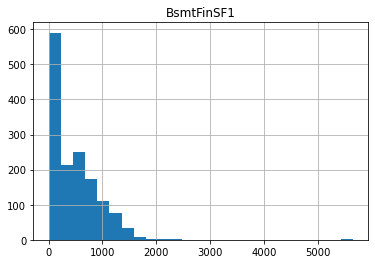

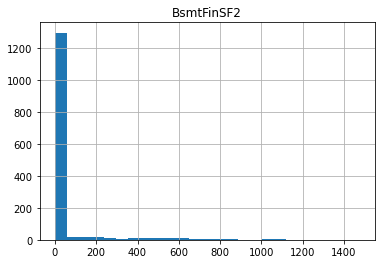

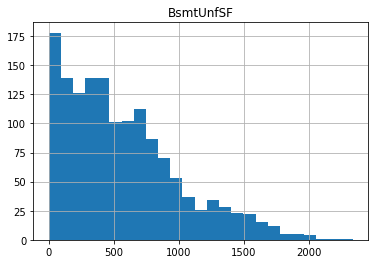

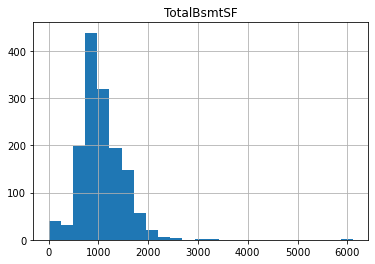

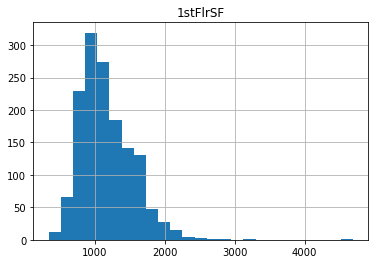

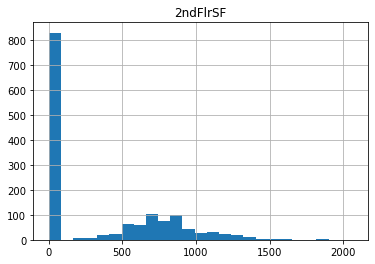

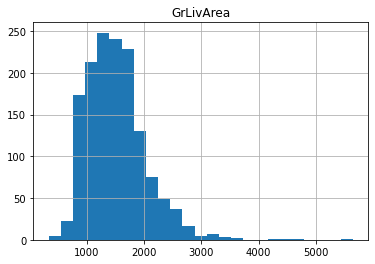

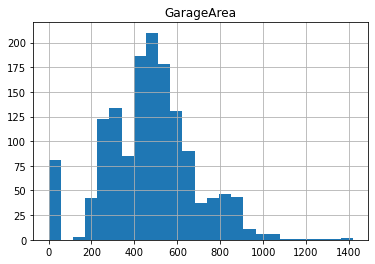

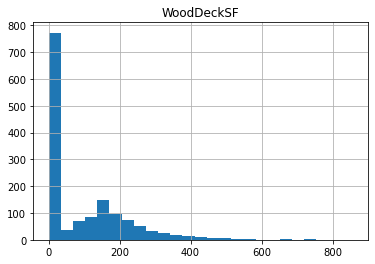

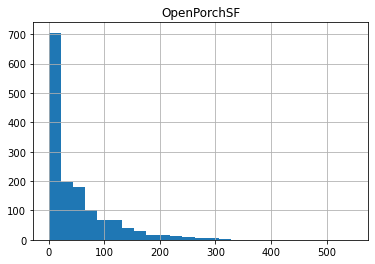

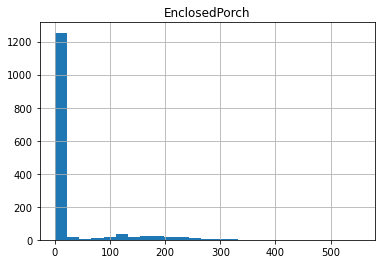

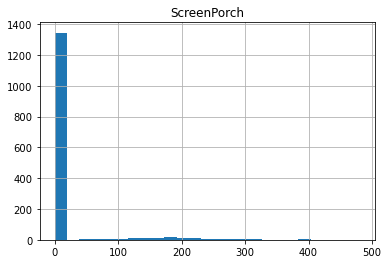

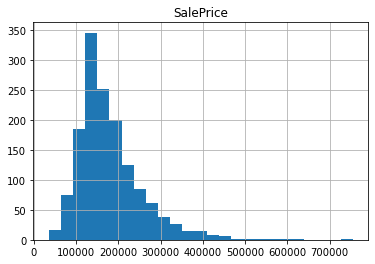

In [318]:
# Plotting the histogram for all the continous features
for feature in continous_feature:
    data = df.copy()
    data[feature].hist(bins=25)
    plt.title(feature)
    plt.show()

From the above graphs few feature are normal distributed and gew features are skewed distribution

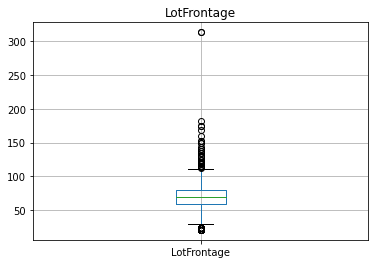

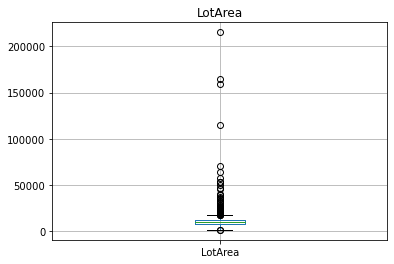

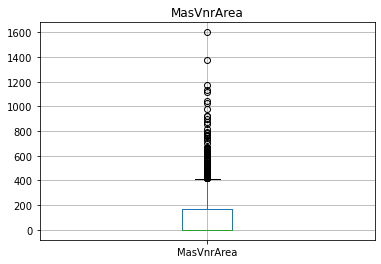

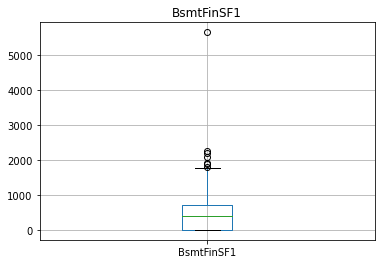

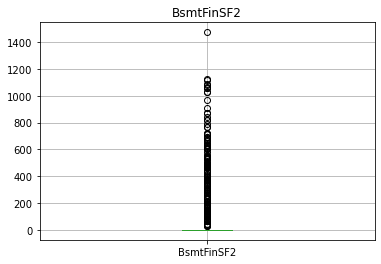

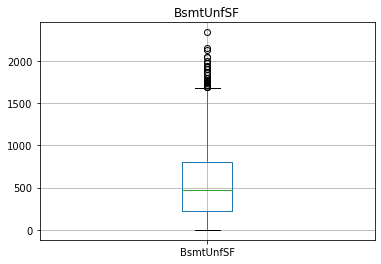

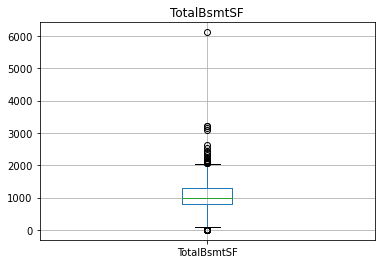

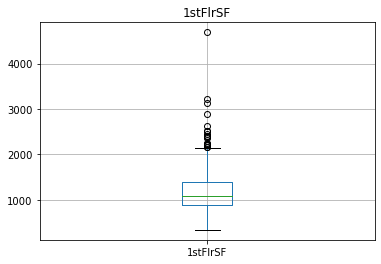

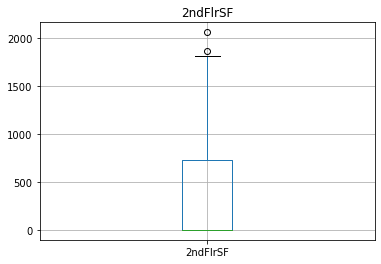

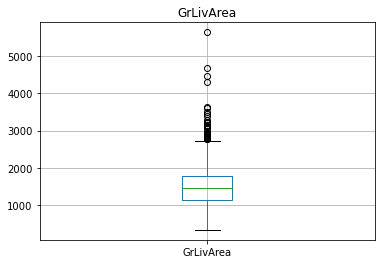

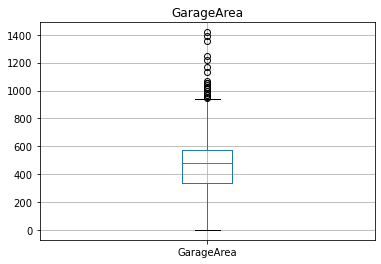

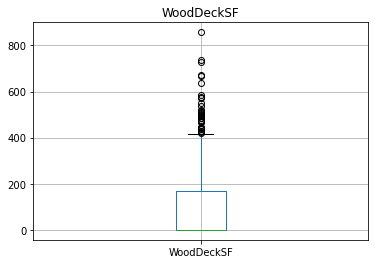

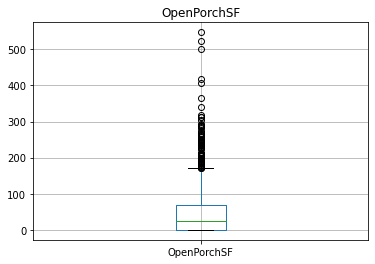

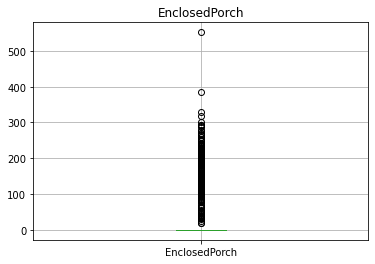

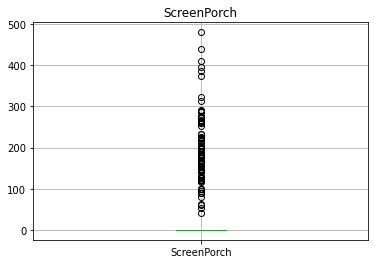

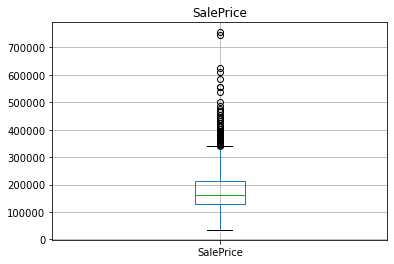

In [319]:
# Plotting the boxplot to check if any of the continous features have outliers
for feature in continous_feature:
    data =df.copy()
    data.boxplot(column=feature)
    plt.title(feature)
    plt.show()

All the continous features ahave outliers, which affect the linear regression model

#### Handling the categorical features

In [320]:
categorical_feature=[feature for feature in df.columns if df[feature].dtype == 'O']
print(f"The total number of categorical features are: {len(categorical_feature)}")

The total number of categorical features are: 43


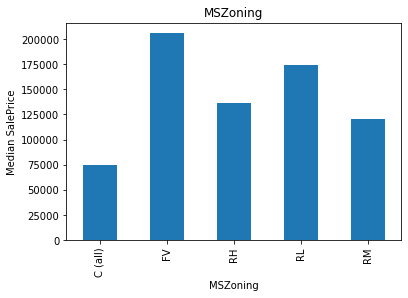

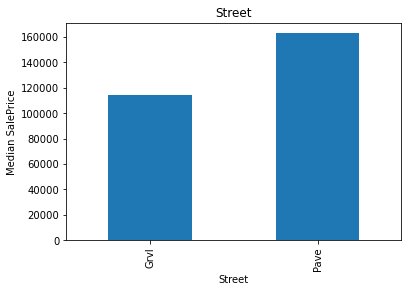

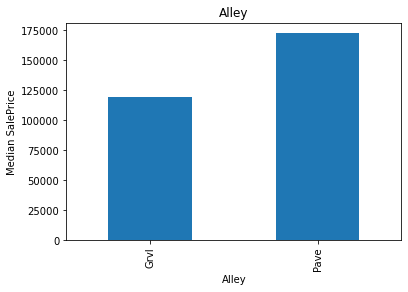

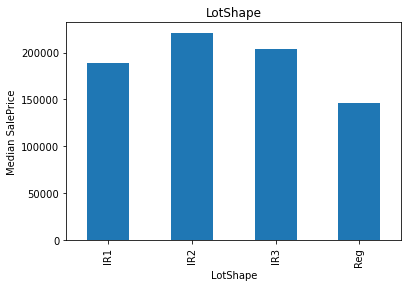

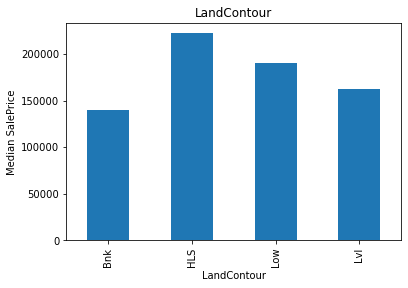

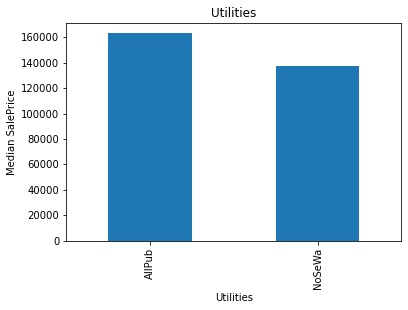

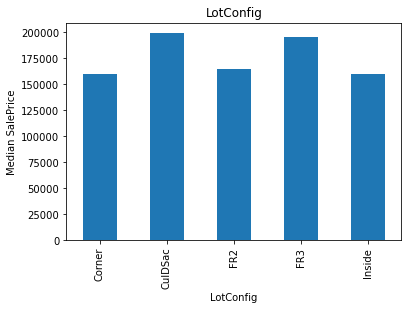

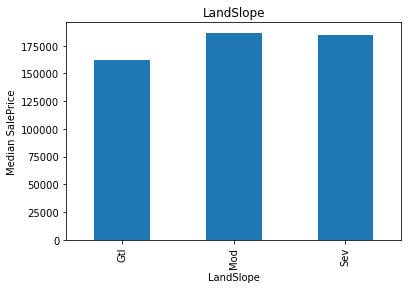

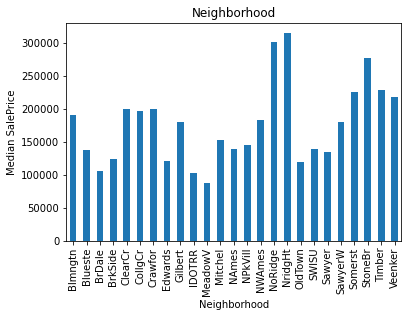

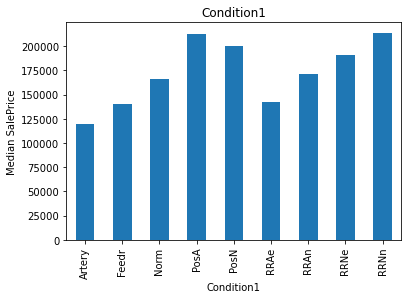

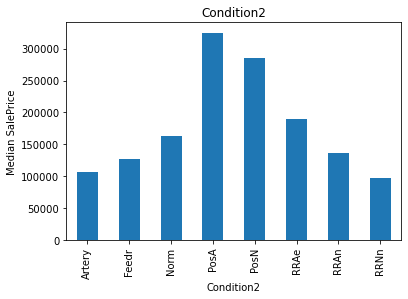

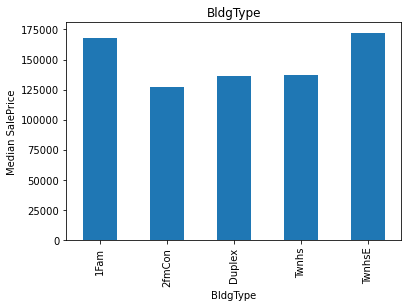

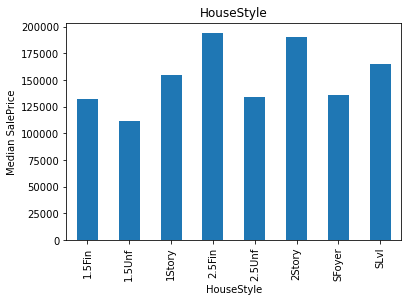

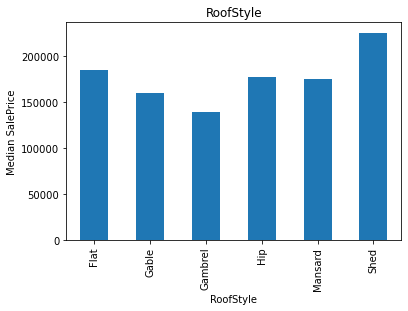

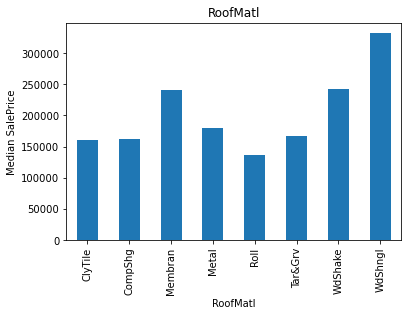

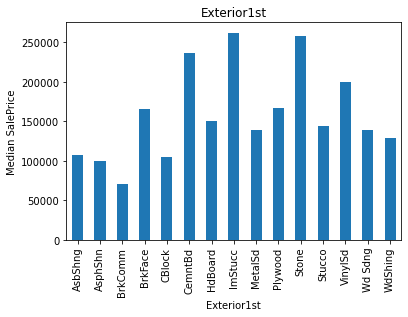

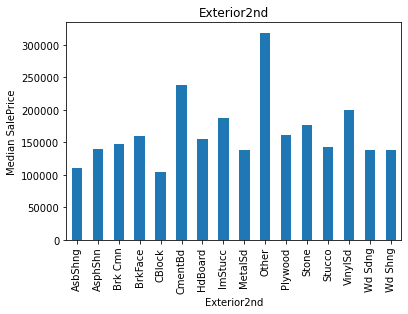

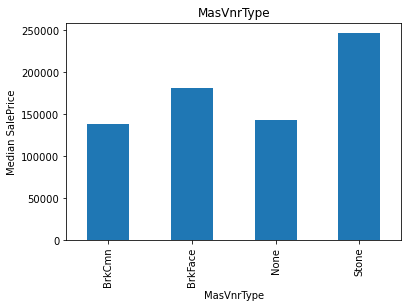

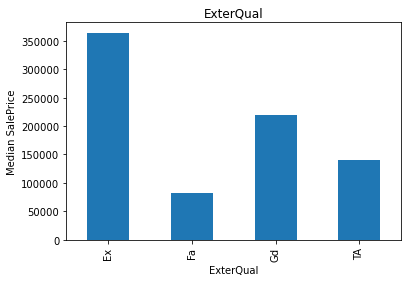

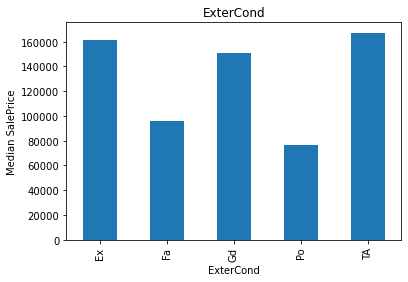

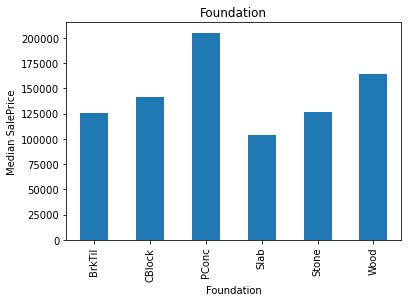

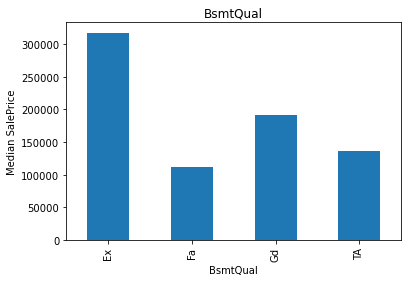

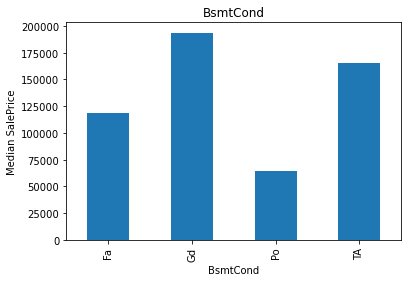

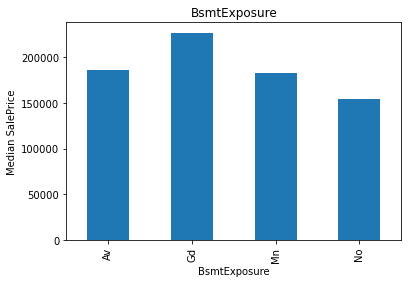

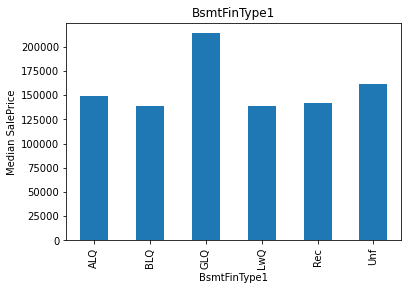

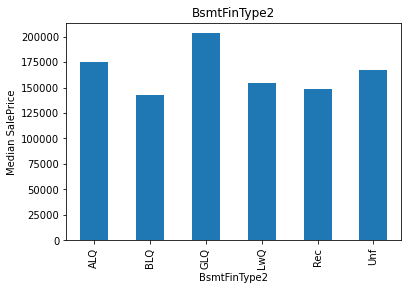

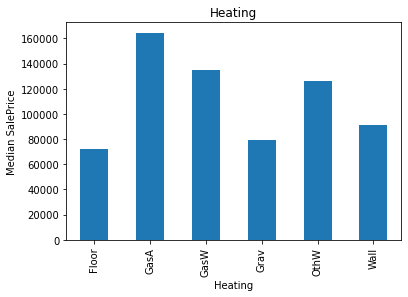

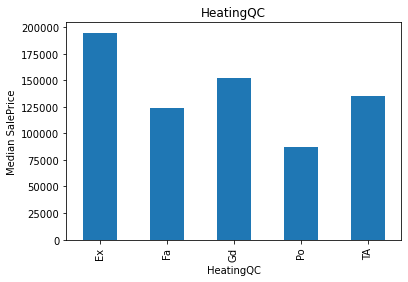

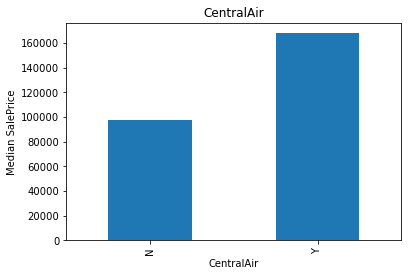

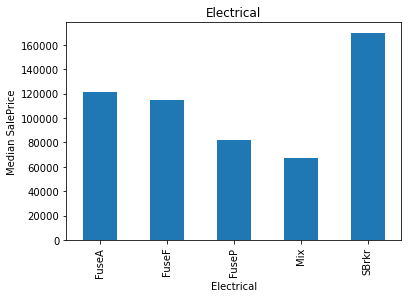

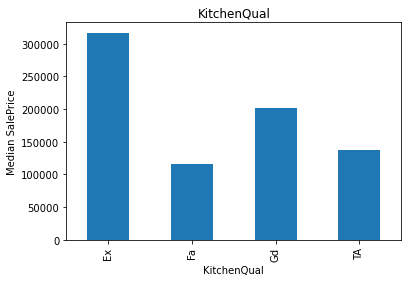

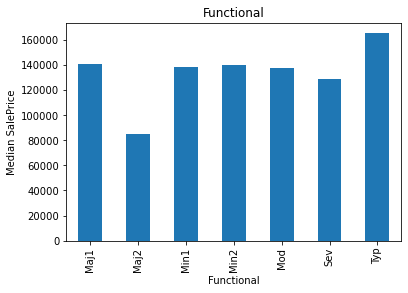

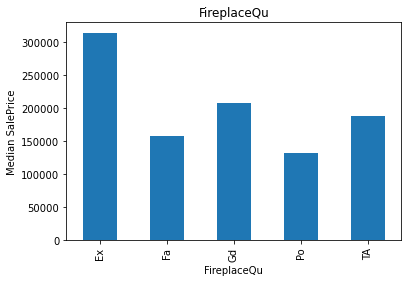

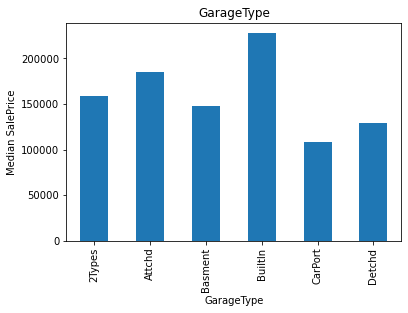

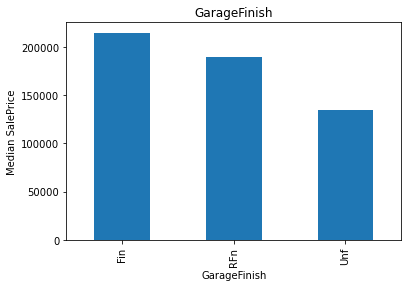

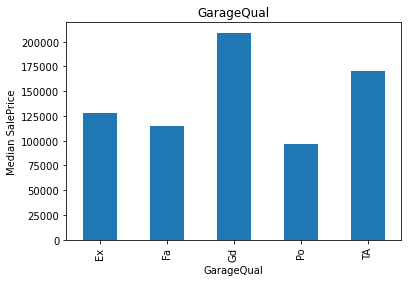

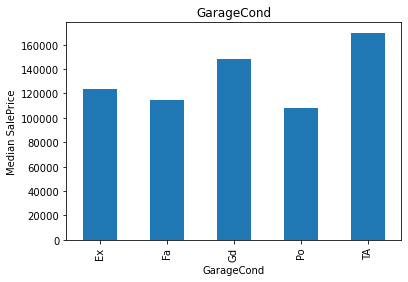

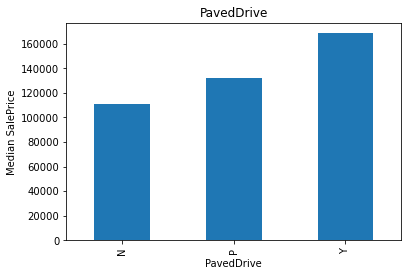

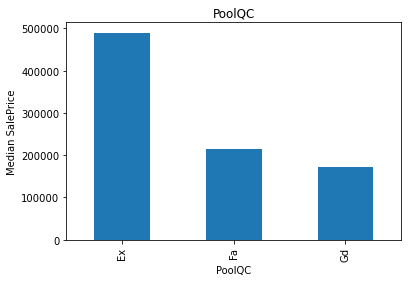

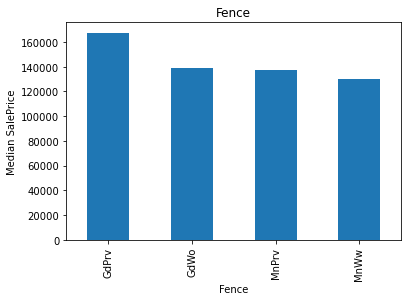

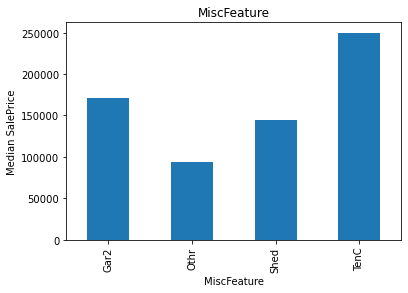

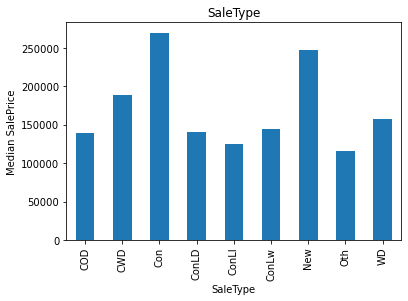

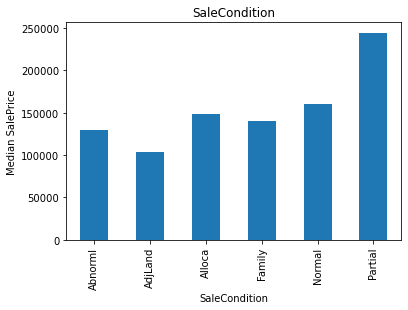

In [321]:
# Plotting the graph between the categorical feature and dependent feature 'SalePrice'
for feature in categorical_feature:
    data = df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Median SalePrice')
    plt.title(feature)
    plt.show()

#### Handling missing values

##### Handling the missing values of categorical_feature

In [322]:
for feature in categorical_feature:
    if df[feature].isnull().sum() > 0:
        df[feature].fillna('Missing', inplace=True)

In [323]:
for feature in categorical_feature:
    print(feature, ': ', df[feature].unique())

MSZoning :  ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street :  ['Pave' 'Grvl']
Alley :  ['Missing' 'Grvl' 'Pave']
LotShape :  ['Reg' 'IR1' 'IR2' 'IR3']
LandContour :  ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities :  ['AllPub' 'NoSeWa']
LotConfig :  ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope :  ['Gtl' 'Mod' 'Sev']
Neighborhood :  ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 :  ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 :  ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType :  ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle :  ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle :  ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl :  ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 

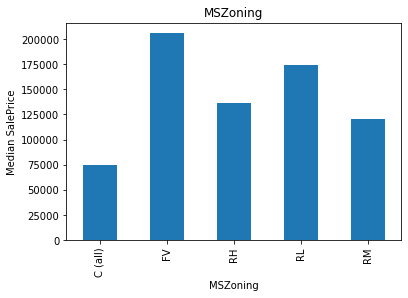

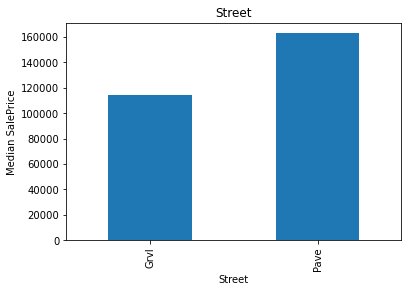

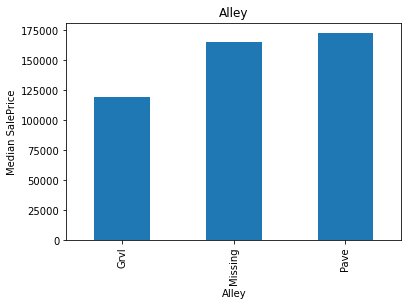

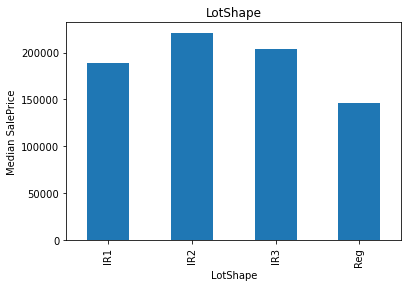

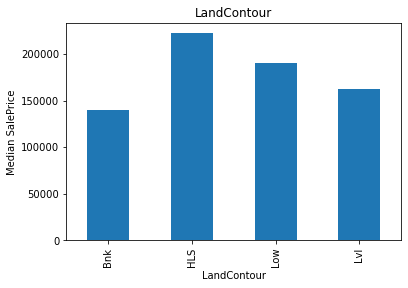

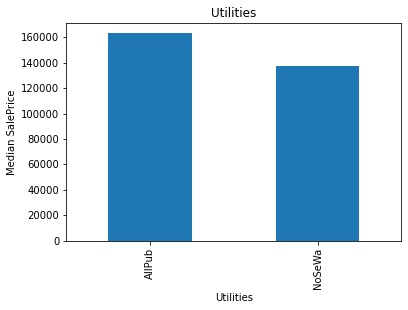

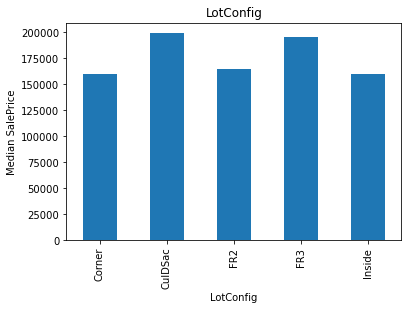

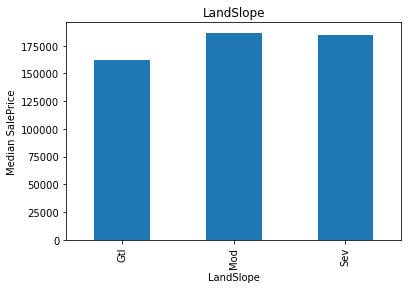

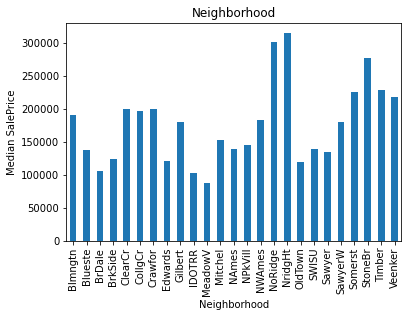

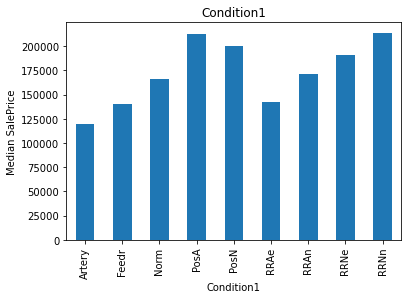

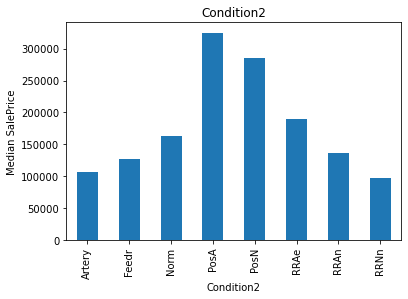

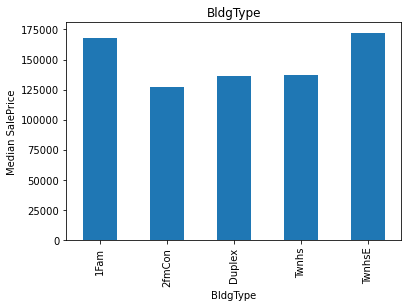

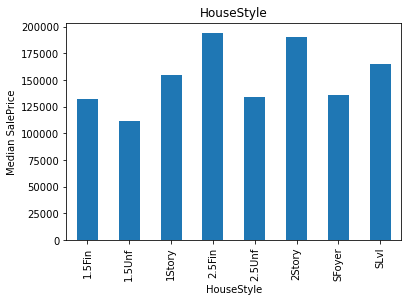

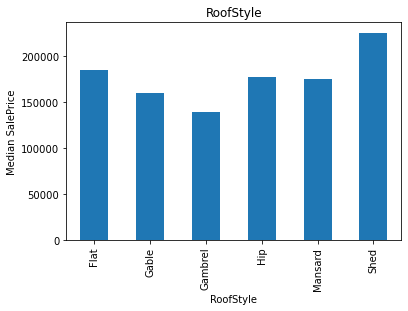

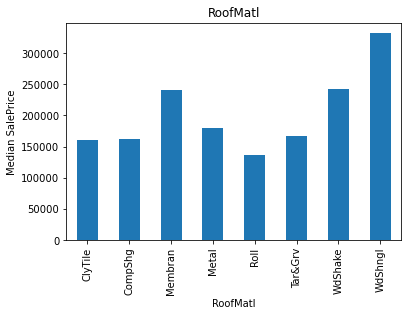

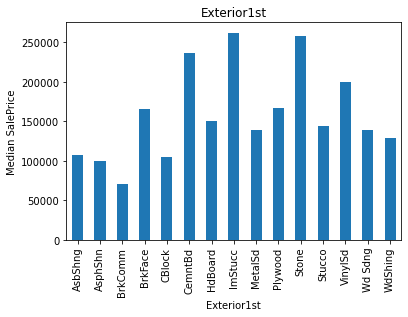

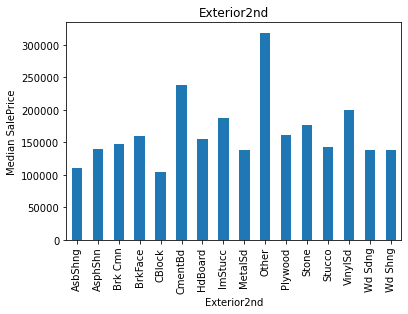

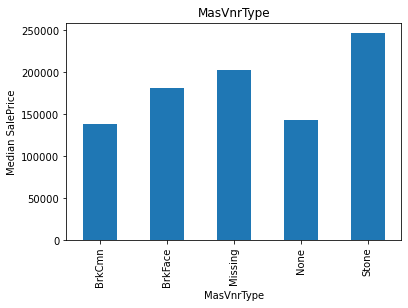

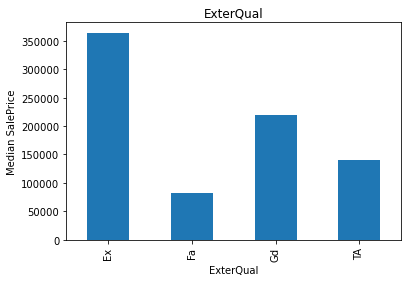

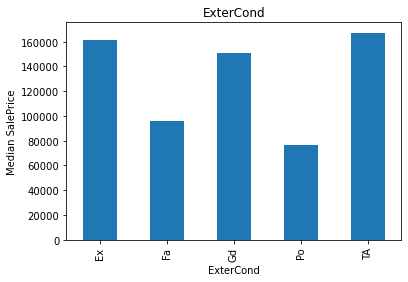

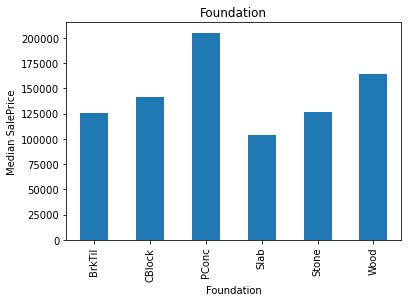

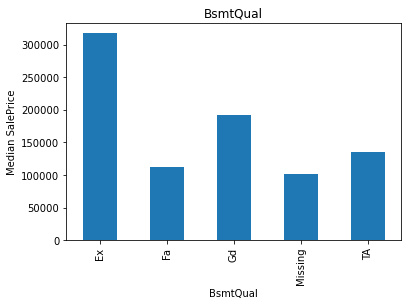

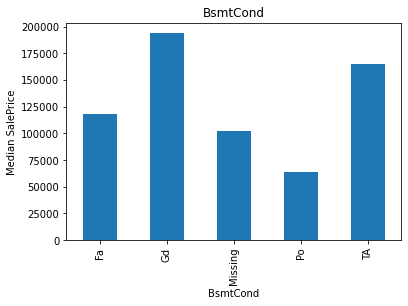

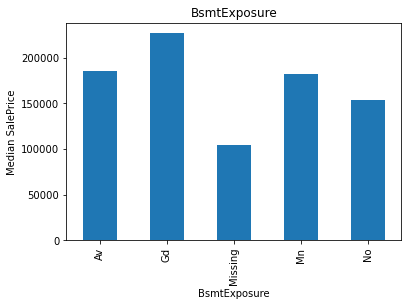

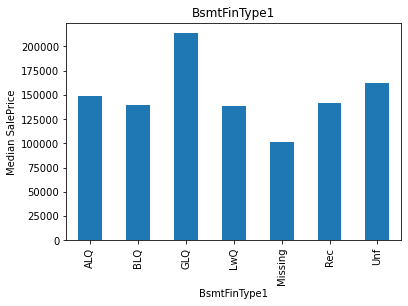

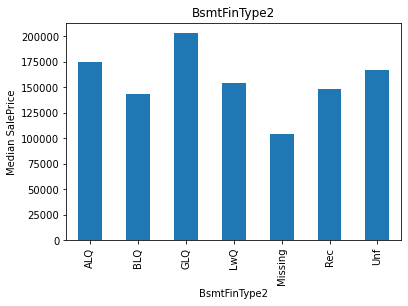

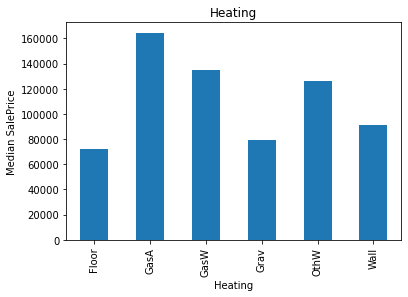

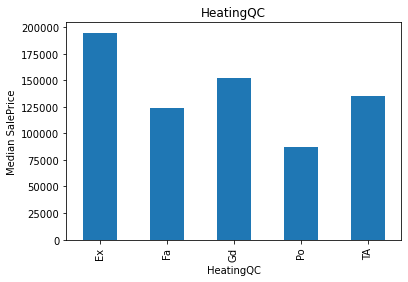

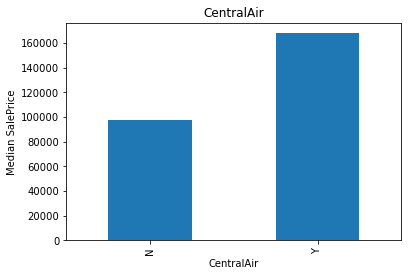

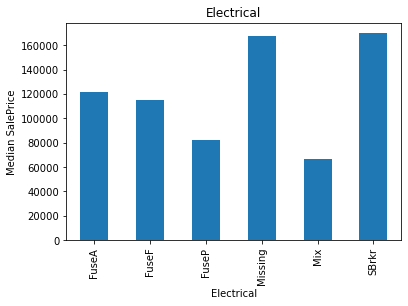

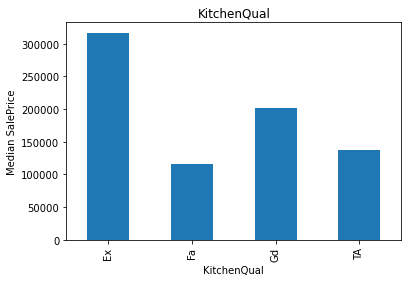

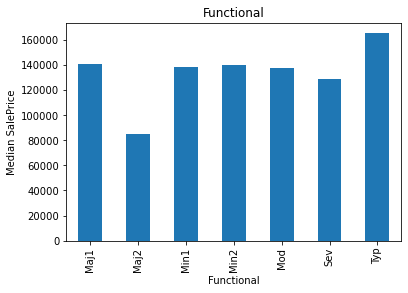

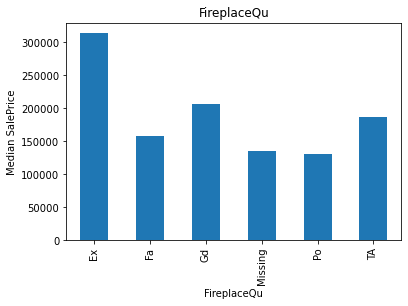

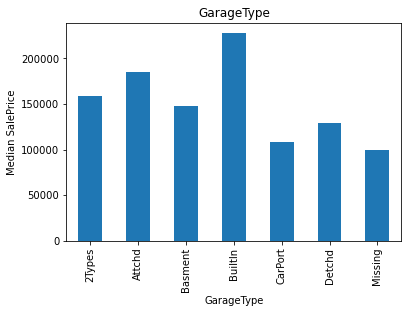

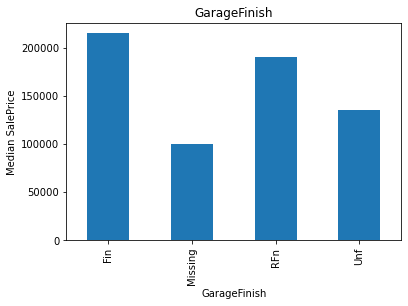

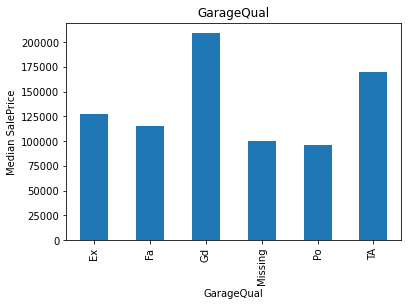

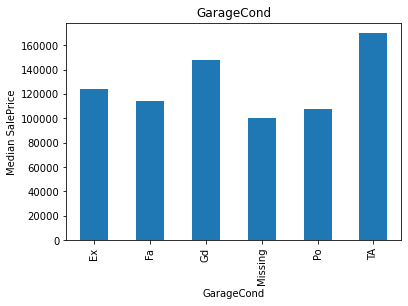

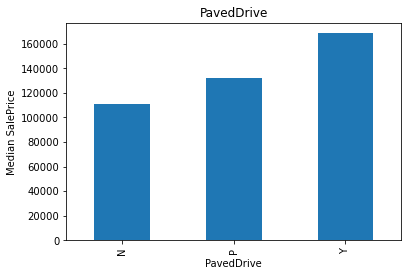

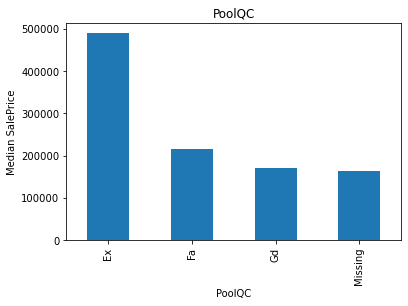

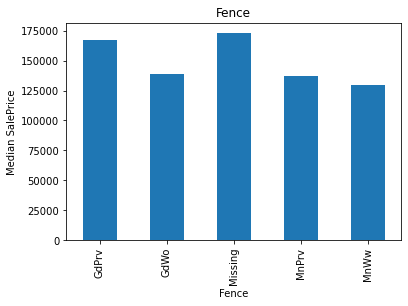

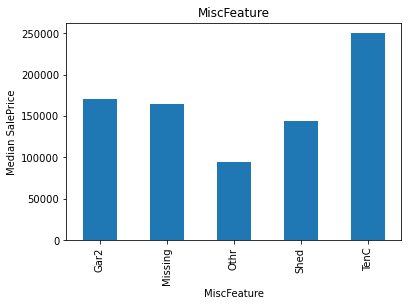

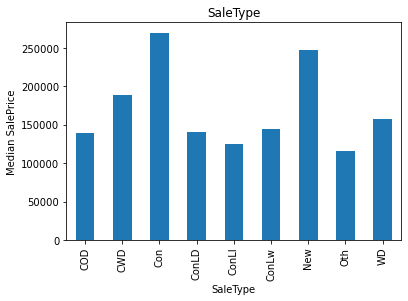

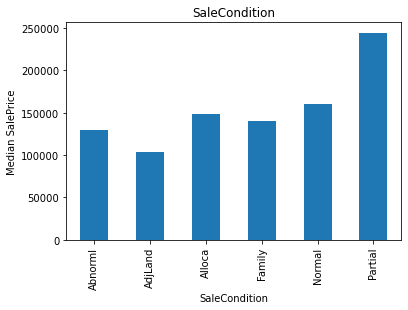

In [324]:
# Plotting the graph after replacing the nan vlaues of categorical feature with an new catgory i.e., 'Missing'
for feature in categorical_feature:
    data = df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Median SalePrice')
    plt.title(feature)
    plt.show()

In [325]:
# Checking if any null values in categorical_feature
for feature in categorical_feature:
    if df[feature].isnull().sum()>0:
        print('Null Value: ',feature)

#### Handling missing value of year_feature

In [326]:
# Handling missing value using random sample imputation
for feature in year_feature:
    if df[feature].isnull().sum() > 0:
        random_sample_year = df[feature].dropna().sample(df[feature].isnull().sum(), random_state=0)
        # Matching the index with the random_sample_year
        random_sample_year.index = df[df[feature].isnull()].index
        df.loc[df[feature].isnull(), feature] = random_sample_year

In [327]:
# Checking for anny missing values in the year_feature
for feature in year_feature:
    if df[feature].isnull().sum() > 0:
        print('Null Values in: ', feature)

#### Handling missing value of numerical_feature

In [328]:
# Handling missing value using random sample imputation
for feature in numerical_feature:
    if df[feature].isnull().sum() > 0:
        print(feature)

LotFrontage
MasVnrArea


In [329]:
for feature in numerical_feature:
    if df[feature].isnull().sum() > 0:
        random_sample_numerical = df[feature].dropna().sample(df[feature].isnull().sum(), random_state=0)
        # Matching the index with random_sample_numerical
        random_sample_numerical.index = df[df[feature].isnull()].index
        df.loc[df[feature].isnull(), feature] = random_sample_numerical

In [330]:
# Checking for any missing values in numerical_feature
for feature in numerical_feature:
    if df[feature].isnull().sum() > 0:
        print('Null Value: ', feature)

In [331]:
for feature in df.columns:
    if df[feature].isnull().sum() > 0:
        print('Null value: ', feature)

All missing values are replaced with meaningful value

In [332]:
pd.set_option('display.max_column', None)

In [333]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000


Handling year_feature

In [334]:
for feature in year_feature:
    if feature != 'YrSold':
        df[feature] = df['YrSold'] - df[feature]

In [335]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000


#### Handling categorical_feature

In [336]:
for feature in categorical_feature:
    count_dict = df[feature].value_counts().to_dict()
    df[feature] = df[feature].map(count_dict)

In [337]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,1151,65.0,8450,1454,1369,925,1311,1459,1052,1382,150,1260,1445,1220,445,7,5,5,5,1141,1434,515,504,445,196.0,488,1282,647,618,1311,953,418,706,1256,0,150,856,1428,741,1365,1334,856,854,0,1710,1,0,2,1,3,1,586,8,1360,0,690,870,5.0,422,2,548,1311,1326,1340,0,61,0,0,0,0,1453,1179,1406,0,2,2008,1267,1198,208500
1,2,20,1151,80.0,9600,1454,1369,925,1311,1459,47,1382,11,81,1445,1220,726,6,8,31,31,1141,1434,220,214,864,0.0,906,1282,634,618,1311,134,220,978,1256,0,284,1262,1428,741,1365,1334,1262,0,0,1262,0,1,2,0,3,1,735,6,1360,1,313,870,31.0,422,2,460,1311,1326,1340,298,0,0,0,0,0,1453,1179,1406,0,5,2007,1267,1198,181500
2,3,60,1151,68.0,11250,1454,1369,484,1311,1459,1052,1382,150,1260,1445,1220,445,7,5,7,6,1141,1434,515,504,445,162.0,488,1282,647,618,1311,114,418,486,1256,0,434,920,1428,741,1365,1334,920,866,0,1786,1,0,2,1,3,1,586,6,1360,1,313,870,7.0,422,2,608,1311,1326,1340,0,42,0,0,0,0,1453,1179,1406,0,9,2008,1267,1198,223500
3,4,70,1151,60.0,9550,1454,1369,484,1311,1459,263,1382,51,1260,1445,1220,445,7,5,91,36,1141,1434,206,38,864,0.0,906,1282,146,649,65,953,220,216,1256,0,540,756,1428,241,1365,1334,961,756,0,1717,1,0,1,0,3,1,586,7,1360,1,380,387,8.0,605,3,642,1311,1326,1340,0,35,272,0,0,0,1453,1179,1406,0,2,2006,1267,101,140000
4,5,60,1151,84.0,14260,1454,1369,484,1311,1459,47,1382,41,1260,1445,1220,445,8,5,8,8,1141,1434,515,504,445,350.0,488,1282,647,618,1311,221,418,655,1256,0,490,1145,1428,741,1365,1334,1145,1053,0,2198,1,0,2,1,4,1,586,9,1360,1,313,870,8.0,422,3,836,1311,1326,1340,192,84,0,0,0,0,1453,1179,1406,0,12,2008,1267,1198,250000


In [338]:
df.describe()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,943.086301,69.871233,10516.828082,1448.049315,1286.535616,747.713699,1182.524658,1458.001370,812.968493,1311.176712,99.780822,1094.326027,1430.189041,1032.130137,516.980822,6.099315,5.575342,36.547945,22.950000,947.958904,1408.590411,291.056164,279.838356,658.352055,103.916438,727.315068,1140.845205,577.056164,561.890411,1182.427397,677.702740,311.275342,443.639726,1086.067123,46.549315,567.240411,1057.429452,1396.971233,542.978082,1282.363014,1225.432877,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,613.110959,6.517808,1268.605479,0.613014,493.516438,631.131507,29.290411,462.036986,1.767123,472.980137,1183.424658,1209.723288,1236.027397,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,1446.045205,973.430137,1355.647945,43.489041,6.321918,2007.815753,1111.083562,1001.089041,180921.195890
std,421.610009,42.300571,402.991484,23.581539,9981.264932,92.666405,319.962351,246.500272,381.236281,38.157604,386.934119,298.250104,63.842839,416.109993,145.418862,423.966894,240.725772,1.382997,1.112799,30.250152,20.640653,367.315879,188.771213,175.412299,172.042728,264.912549,181.008097,245.191893,379.297465,170.945356,185.678373,381.533286,379.123925,137.979951,456.098091,421.825243,161.319273,441.866955,438.705324,207.351534,217.377596,313.348612,353.496998,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,186.106494,1.625393,337.171581,0.644666,200.252898,305.452990,24.630078,141.140182,0.747315,213.804841,378.633359,365.999191,347.639607,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,100.234424,421.854735,257.030425,496.123024,2.703626,1.328095,399.981015,421.481019,79442.502883
min,1.000000,20.000000,10.000000,21.000000,1300.000000,6.000000,41.000000,10.000000,36.000000,1.000000,4.000000,13.000000,2.000000,2.000000,1.000000,31.000000,8.000000,1.000000,1.000000,0.000000,-1.000000,2.000000,1.000000,1.000000,1.000000,8.000000,0.000000,14.000000,1.000000,3.000000,35.000000,2.000000,38.000000,37.000000,0.000000,14.000000,0.000000,0.000000,0.000000,1.000000,1.000000,95.000000,1.000000,334.000000,0.

#### Handling Outliers

In [339]:
normal_distribution=['LotFrontage','TotalBsmtSF','1stFlrSF','GrLivArea','GarageArea']

In [340]:
skewed_distribution=[feature for feature in continous_feature if feature not in normal_distribution + ['SalePrice']]

In [341]:
print(skewed_distribution)

['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch']


In [342]:
print(normal_distribution)

['LotFrontage', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageArea']


In [343]:
# Handling normal distribution feature
for feature in normal_distribution:
    upper_bound_normal = int(df[feature].mean() + 3 * df[feature].std())
    lower_bound_normal = int(df[feature].mean() - 3 * df[feature].std())
    print(feature,upper_bound_normal, lower_bound_normal)
    if lower_bound_normal > 0:
        df.loc[df[feature] < lower_bound_normal, feature] = lower_bound_normal
    df.loc[df[feature] > upper_bound_normal, feature] = upper_bound_normal

LotFrontage 140 0
TotalBsmtSF 2373 -258
1stFlrSF 2322 2
GrLivArea 3091 -60
GarageArea 1114 -168


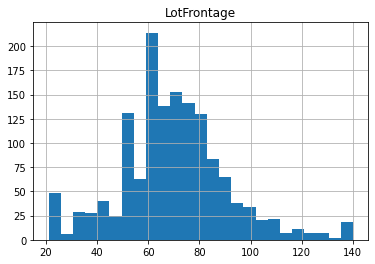

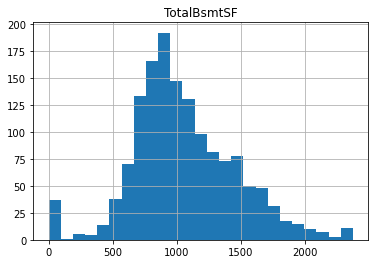

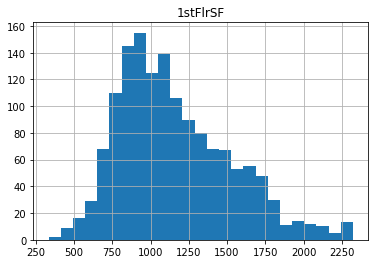

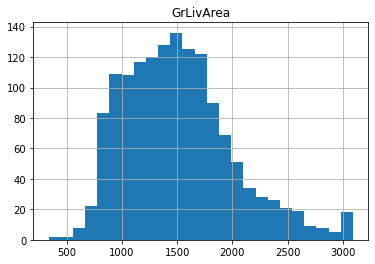

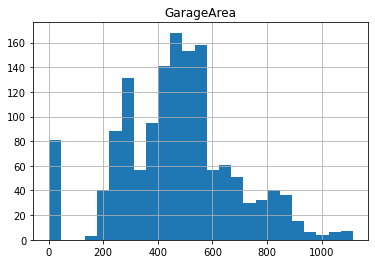

In [344]:
for feature in normal_distribution:
    df[feature].hist(bins=25)
    plt.title(feature)
    plt.show()

In [345]:
# Handling skewed distribution features
for feature in skewed_distribution:
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    
    lower_bound_skew = df[feature].quantile(0.25) - (IQR * 1.5)
    upper_bound_skew = df[feature].quantile(0.75) + (IQR * 1.5)
    lower_bound_skew_ext = df[feature].quantile(0.25) - (IQR * 3)
    upper_bound_skew_ext = df[feature].quantile(0.75) + (IQR * 3)
    
    if lower_bound_skew_ext >= 0:
        df.loc[df[feature] < lower_bound_skew_ext, feature] = lower_bound_skew_ext
    if lower_bound_skew >= 0:
        df.loc[df[feature] < lower_bound_skew, feature] = lower_bound_skew
    max_value = df[feature].max()
    if upper_bound_skew_ext < max_value:
        df.loc[df[feature] >= upper_bound_skew_ext, feature] = upper_bound_skew_ext
    if upper_bound_skew < max_value:
        df.loc[df[feature] >= upper_bound_skew, feature] = upper_bound_skew

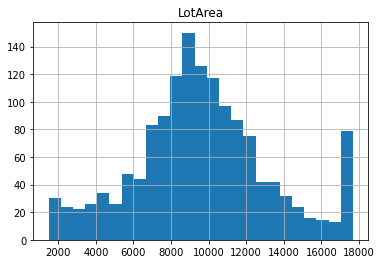

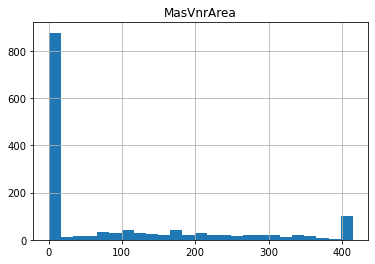

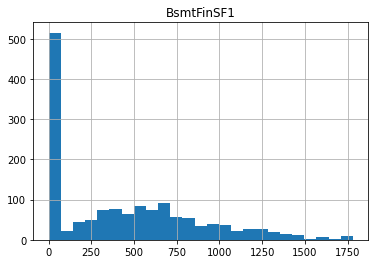

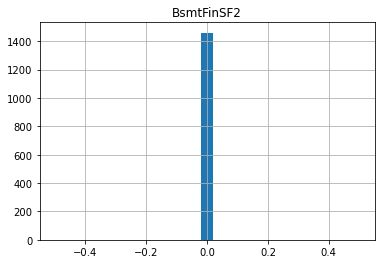

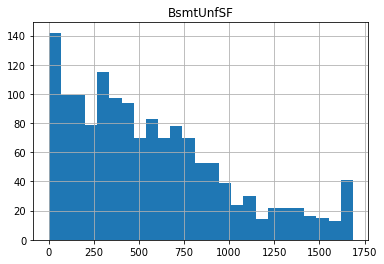

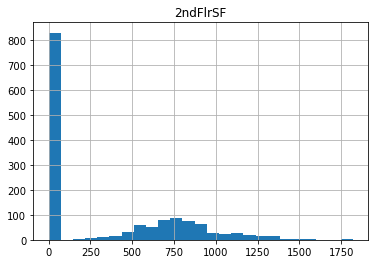

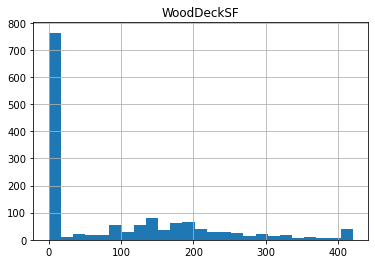

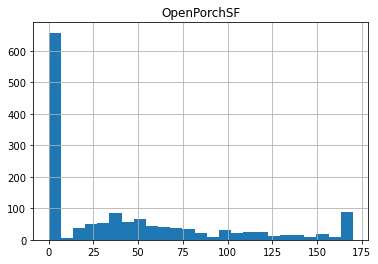

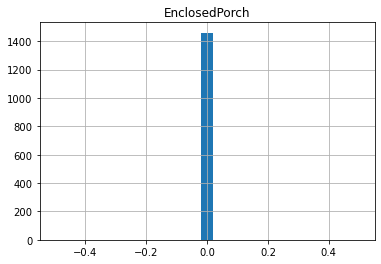

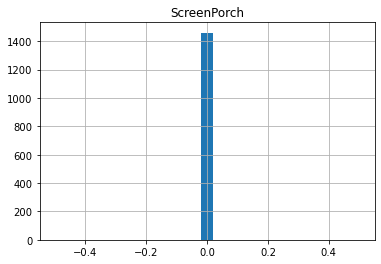

In [346]:
for feature in skewed_distribution:
    df[feature].hist(bins=25)
    plt.title(feature)
    plt.show()

In [347]:
# Checking for any missing value or nan value
for feature in df.columns:
    if df[feature].isnull().sum() > 0:
        print("Null Value: ", feature)

In [348]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,1151,65.0,8450.0,1454,1369,925,1311,1459,1052,1382,150,1260,1445,1220,445,7,5,5,5,1141,1434,515,504,445,196.0,488,1282,647,618,1311,953,418,706.0,1256,0,150.0,856,1428,741,1365,1334,856,854,0,1710,1,0,2,1,3,1,586,8,1360,0,690,870,5.0,422,2,548,1311,1326,1340,0,61,0,0,0,0,1453,1179,1406,0,2,2008,1267,1198,208500
1,2,20,1151,80.0,9600.0,1454,1369,925,1311,1459,47,1382,11,81,1445,1220,726,6,8,31,31,1141,1434,220,214,864,0.0,906,1282,634,618,1311,134,220,978.0,1256,0,284.0,1262,1428,741,1365,1334,1262,0,0,1262,0,1,2,0,3,1,735,6,1360,1,313,870,31.0,422,2,460,1311,1326,1340,298,0,0,0,0,0,1453,1179,1406,0,5,2007,1267,1198,181500
2,3,60,1151,68.0,11250.0,1454,1369,484,1311,1459,1052,1382,150,1260,1445,1220,445,7,5,7,6,1141,1434,515,504,445,162.0,488,1282,647,618,1311,114,418,486.0,1256,0,434.0,920,1428,741,1365,1334,920,866,0,1786,1,0,2,1,3,1,586,6,1360,1,313,870,7.0,422,2,608,1311,1326,1340,0,42,0,0,0,0,1453,1179,1406,0,9,2008,1267,1198,223500
3,4,70,1151,60.0,9550.0,1454,1369,484,1311,1459,263,1382,51,1260,1445,1220,445,7,5,91,36,1141,1434,206,38,864,0.0,906,1282,146,649,65,953,220,216.0,1256,0,540.0,756,1428,241,1365,1334,961,756,0,1717,1,0,1,0,3,1,586,7,1360,1,380,387,8.0,605,3,642,1311,1326,1340,0,35,0,0,0,0,1453,1179,1406,0,2,2006,1267,101,140000
4,5,60,1151,84.0,14260.0,1454,1369,484,1311,1459,47,1382,41,1260,1445,1220,445,8,5,8,8,1141,1434,515,504,445,350.0,488,1282,647,618,1311,221,418,655.0,1256,0,490.0,1145,1428,741,1365,1334,1145,1053,0,2198,1,0,2,1,4,1,586,9,1360,1,313,870,8.0,422,3,836,1311,1326,1340,192,84,0,0,0,0,1453,1179,1406,0,12,2008,1267,1198,250000


#### Feature Scaling

In [349]:
import pylab
import scipy.stats as stat

In [350]:
def plot_data(df, feature):
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stat.probplot(df[feature], dist='norm', plot=pylab)
    plt.title(feature)
    plt.show()

Choosing with transformation is best

In [351]:
continous_feature

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

In [352]:
continous_feature_without_output = continous_feature[:len(continous_feature)-1]

In [353]:
len(continous_feature)

16

In [354]:
len(continous_feature_without_output)

15

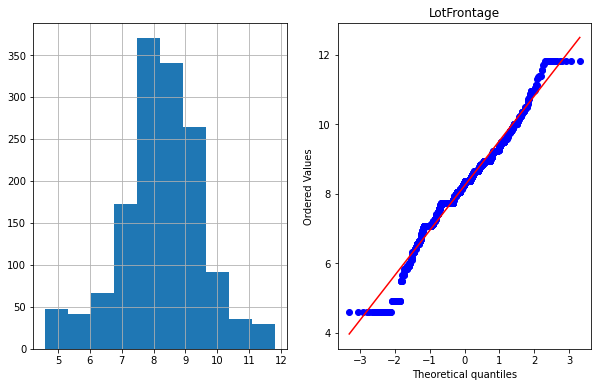

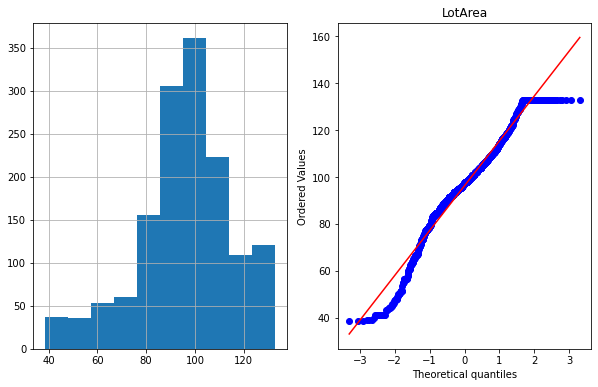

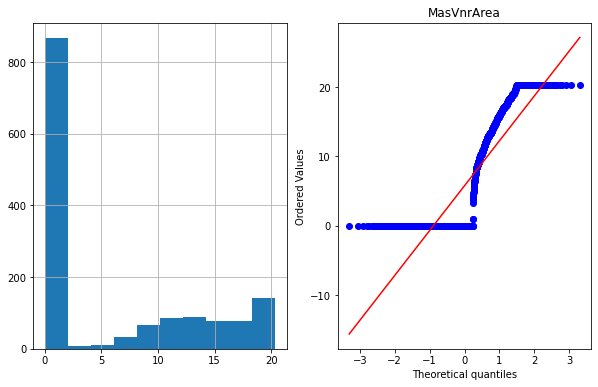

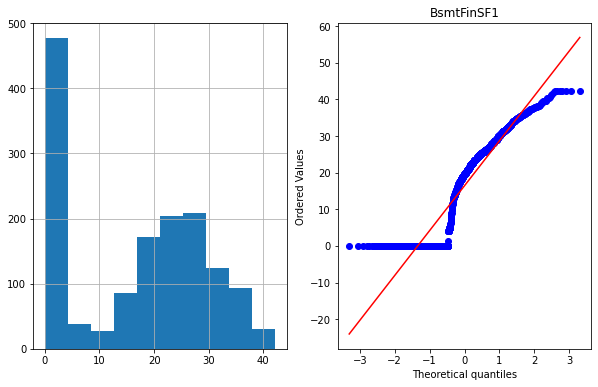

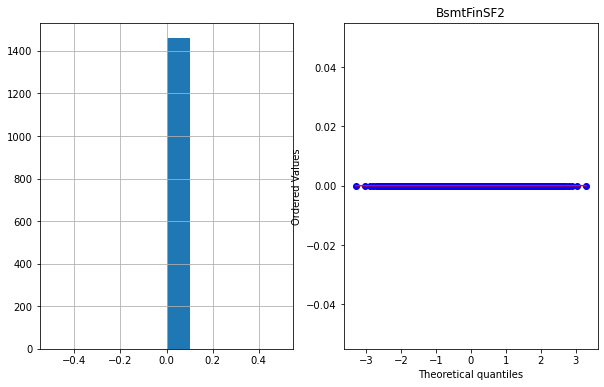

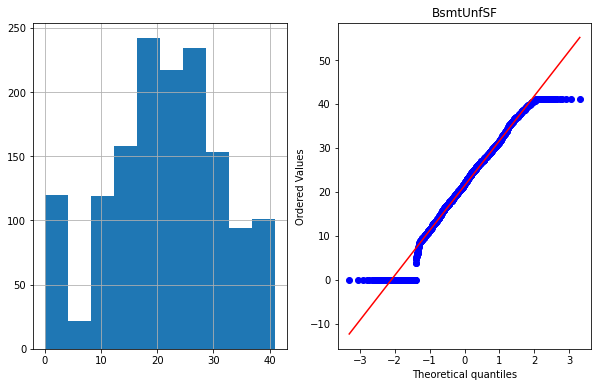

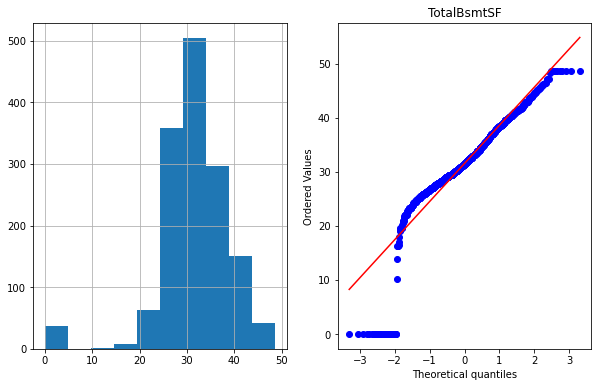

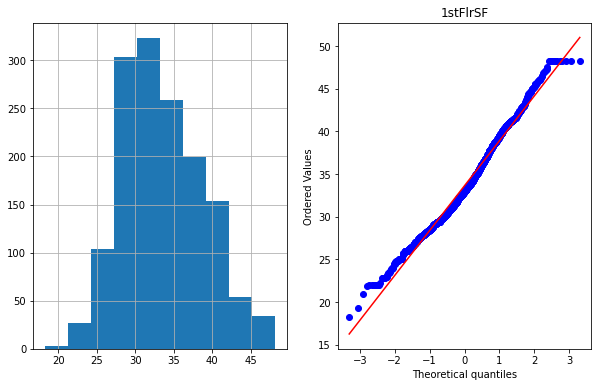

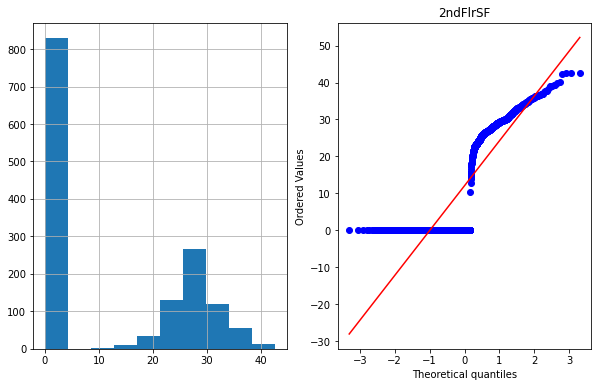

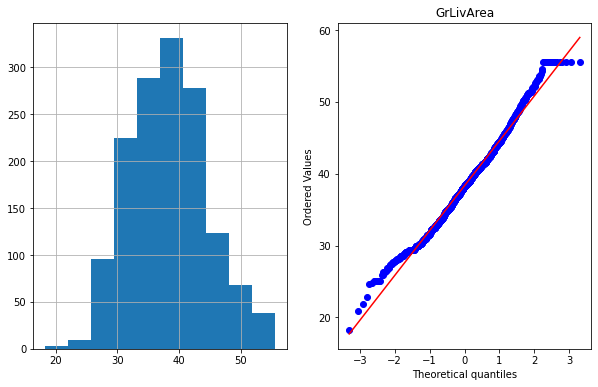

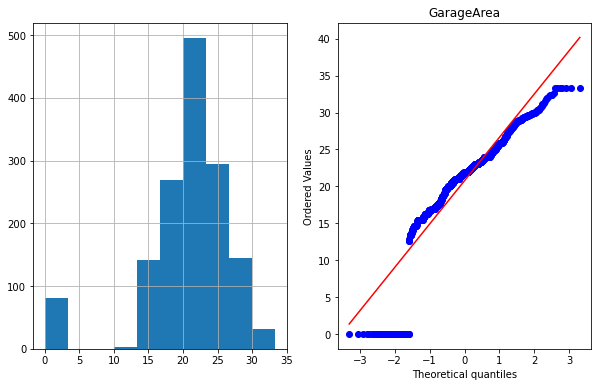

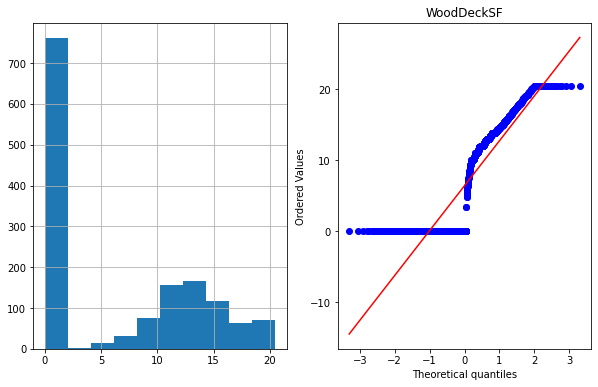

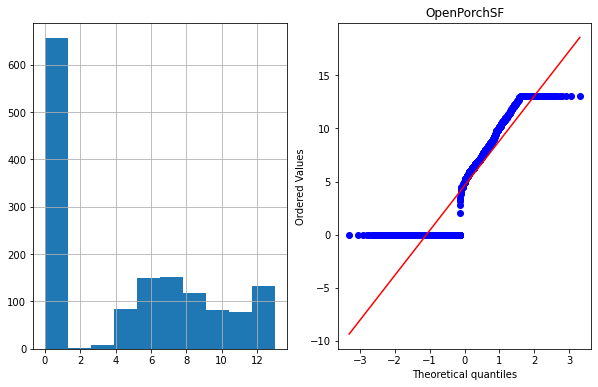

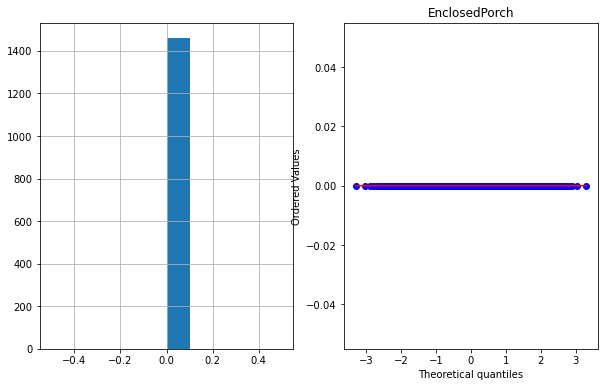

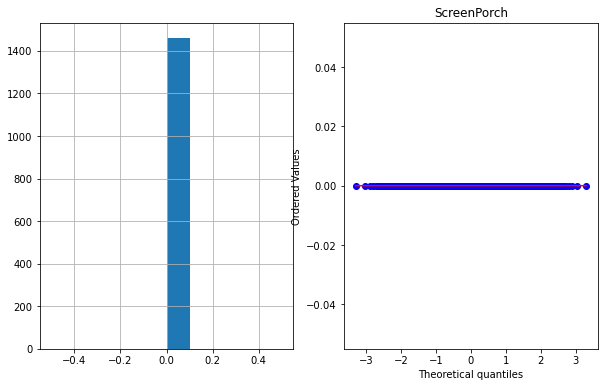

In [355]:
for feature in continous_feature_without_output:
    df[feature] = df[feature] ** (0.5)
    plot_data(df, feature)

In [356]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,1151,8.062258,91.923882,1454,1369,925,1311,1459,1052,1382,150,1260,1445,1220,445,7,5,5,5,1141,1434,515,504,445,14.000000,488,1282,647,618,1311,953,418,26.570661,1256,0.0,12.247449,29.257478,1428,741,1365,1334,29.257478,29.223278,0,41.352146,1,0,2,1,3,1,586,8,1360,0,690,870,5.0,422,2,23.409400,1311,1326,1340,0.000000,7.810250,0.0,0,0.0,0,1453,1179,1406,0,2,2008,1267,1198,208500
1,2,20,1151,8.944272,97.979590,1454,1369,925,1311,1459,47,1382,11,81,1445,1220,726,6,8,31,31,1141,1434,220,214,864,0.000000,906,1282,634,618,1311,134,220,31.272992,1256,0.0,16.852300,35.524639,1428,741,1365,1334,35.524639,0.000000,0,35.524639,0,1,2,0,3,1,735,6,1360,1,313,870,31.0,422,2,21.447611,1311,1326,1340,17.262677,0.000000,0.0,0,0.0,0,1453,1179,1406,0,5,2007,1267,1198,181500
2,3,60,1151,8.246211,106.066017,1454,1369,484,1311,1459,1052,1382,150,1260,1445,1220,445,7,5,7,6,1141,1434,515,504,445,12.727922,488,1282,647,618,1311,114,418,22.045408,1256,0.0,20.832667,30.331502,1428,741,1365,1334,30.331502,29.427878,0,42.261093,1,0,2,1,3,1,586,6,1360,1,313,870,7.0,422,2,24.657656,1311,1326,1340,0.000000,6.480741,0.0,0,0.0,0,1453,1179,1406,0,9,2008,1267,1198,223500
3,4,70,1151,7.745967,97.724101,1454,1369,484,1311,1459,263,1382,51,1260,1445,1220,445,7,5,91,36,1141,1434,206,38,864,0.000000,906,1282,146,649,65,953,220,14.696938,1256,0.0,23.237900,27.495454,1428,241,1365,1334,31.000000,27.495454,0,41.436699,1,0,1,0,3,1,586,7,1360,1,380,387,8.0,605,3,25.337719,1311,1326,1340,0.000000,5.916080,0.0,0,0.0,0,1453,1179,1406,0,2,2006,1267,101,140000
4,5,60,1151,9.165151,119.415242,1454,1369,484,1311,1459,47,1382,41,1260,1445,1220,445,8,5,8,8,1141,1434,515,504,445,18.708287,488,1282,647,618,1311,221,418,25.592968,1256,0.0,22.135944,33.837849,1428,741,1365,1334,33.837849,32.449961,0,46.882833,1,0,2,1,4,1,586,9,1360,1,313,870,8.0,422,3,28.913665,1311,1326,1340,13.856406,9.165151,0.0,0,0.0,0,1453,1179,1406,0,12,2008,1267,1198,250000


In [357]:
for feature in discrete_feature:
    df[feature] = df[feature] ** 0.5

In [358]:
for feature in categorical_feature:
    df[feature] = df[feature] ** 0.5

In [359]:
for feature in year_feature:
    df[feature] = df[feature] ** 0.5

In [360]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,7.745967,33.926391,8.062258,91.923882,38.131352,37.0,30.413813,36.207734,38.196859,32.434549,37.175261,12.247449,35.496479,38.013156,34.928498,21.095023,2.645751,2.236068,2.236068,2.236068,33.778692,37.868192,22.693611,22.449944,21.095023,14.000000,22.090722,35.805028,25.436195,24.859606,36.207734,30.870698,20.445048,26.570661,35.44009,0.0,12.247449,29.257478,37.788887,27.221315,36.945906,36.523965,29.257478,29.223278,0.0,41.352146,1.0,0.0,1.414214,1.0,1.732051,1.0,24.207437,2.828427,36.878178,0.0,26.267851,29.495762,2.236068,20.542639,1.414214,23.409400,36.207734,36.414283,36.60601,0.000000,7.810250,0.0,0.0,0.0,0.0,38.118237,34.336569,37.496667,0.0,1.414214,44.810713,35.594943,34.612137,208500
1,2,4.472136,33.926391,8.944272,97.979590,38.131352,37.0,30.413813,36.207734,38.196859,6.855655,37.175261,3.316625,9.000000,38.013156,34.928498,26.944387,2.449490,2.828427,5.567764,5.567764,33.778692,37.868192,14.832397,14.628739,29.393877,0.000000,30.099834,35.805028,25.179357,24.859606,36.207734,11.575837,14.832397,31.272992,35.44009,0.0,16.852300,35.524639,37.788887,27.221315,36.945906,36.523965,35.524639,0.000000,0.0,35.524639,0.0,1.0,1.414214,0.0,1.732051,1.0,27.110883,2.449490,36.878178,1.0,17.691806,29.495762,5.567764,20.542639,1.414214,21.447611,36.207734,36.414283,36.60601,17.262677,0.000000,0.0,0.0,0.0,0.0,38.118237,34.336569,37.496667,0.0,2.236068,44.799554,35.594943,34.612137,181500
2,3,7.745967,33.926391,8.246211,106.066017,38.131352,37.0,22.000000,36.207734,38.196859,32.434549,37.175261,12.247449,35.496479,38.013156,34.928498,21.095023,2.645751,2.236068,2.645751,2.449490,33.778692,37.868192,22.693611,22.449944,21.095023,12.727922,22.090722,35.805028,25.436195,24.859606,36.207734,10.677078,20.445048,22.045408,35.44009,0.0,20.832667,30.331502,37.788887,27.221315,36.945906,36.523965,30.331502,29.427878,0.0,42.261093,1.0,0.0,1.414214,1.0,1.732051,1.0,24.207437,2.449490,36.878178,1.0,17.691806,29.495762,2.645751,20.542639,1.414214,24.657656,36.207734,36.414283,36.60601,0.000000,6.480741,0.0,0.0,0.0,0.0,38.118237,34.336569,37.496667,0.0,3.000000,44.810713,35.594943,34.612137,223500
3,4,8.366600,33.926391,7.745967,97.724101,38.131352,37.0,22.000000,36.207734,38.196859,16.217275,37.175261,7.141428,35.496479,38.013156,34.928498,21.095023,2.645751,2.236068,9.539392,6.000000,33.778692,37.868192,14.352700,6.164414,29.393877,0.000000,30.099834,35.805028,12.083046,25.475478,8.062258,30.870698,14.832397,14.696938,35.44009,0.0,23.237900,27.495454,37.788887,15.524175,36.945906,36.523965,31.000000,27.495454,0.0,41.436699,1.0,0.0,1.000000,0.0,1.732051,1.0,24.207437,2.645751,36.878178,1.0,19.493589,19.672316,2.828427,24.596748,1.732051,25.337719,36.207734,36.414283,36.60601,0.000000,5.916080,0.0,0.0,0.0,0.0,38.118237,34.336569,37.496667,0.0,1.414214,44.788391,35.594943,10.049876,140000
4,5,7.745967,33.926391,9.165151,119.415242,38.131352,37.0,22.000000,36.207734,38.196859,6.855655,37.175261,6.403124,35.496479,38.013156,34.928498,21.095023,2.828427,2.236068,2.828427,2.828427,33.778692,37.868192,22.693611,22.449944,21.095023,18.708287,22.090722,35.805028,25.436195,24.859606,36.207734,14.866069,20.4450

In [361]:
df.max()

Id                 1460.000000
MSSubClass           13.784049
MSZoning             33.926391
LotFrontage          11.832160
LotArea             132.941717
                     ...      
MoSold                3.464102
YrSold               44.833024
SaleType             35.594943
SaleCondition        34.612137
SalePrice        755000.000000
Length: 81, dtype: float64

In [362]:
for feature in df.columns:
    if df[feature].isnull().sum() > 0:
        print(feature)

YearRemodAdd
GarageYrBlt


In [363]:
random_sample1 = df['YearRemodAdd'].dropna().sample(df['YearRemodAdd'].isnull().sum(), random_state=0)
random_sample1.index = df[df['YearRemodAdd'].isnull()].index
df.loc[df['YearRemodAdd'].isnull(), 'YearRemodAdd'] = random_sample1

In [364]:
random_sample2 = df['GarageYrBlt'].dropna().sample(df['GarageYrBlt'].isnull().sum(), random_state=0)
random_sample2.index = df[df['GarageYrBlt'].isnull()].index
df.loc[df['GarageYrBlt'].isnull(), 'GarageYrBlt'] = random_sample2

In [365]:
for fetaure in df.columns:
    if df[feature].isnull().sum() > 0:
        print(feature)

In [366]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,7.745967,33.926391,8.062258,91.923882,38.131352,37.0,30.413813,36.207734,38.196859,32.434549,37.175261,12.247449,35.496479,38.013156,34.928498,21.095023,2.645751,2.236068,2.236068,2.236068,33.778692,37.868192,22.693611,22.449944,21.095023,14.000000,22.090722,35.805028,25.436195,24.859606,36.207734,30.870698,20.445048,26.570661,35.44009,0.0,12.247449,29.257478,37.788887,27.221315,36.945906,36.523965,29.257478,29.223278,0.0,41.352146,1.0,0.0,1.414214,1.0,1.732051,1.0,24.207437,2.828427,36.878178,0.0,26.267851,29.495762,2.236068,20.542639,1.414214,23.409400,36.207734,36.414283,36.60601,0.000000,7.810250,0.0,0.0,0.0,0.0,38.118237,34.336569,37.496667,0.0,1.414214,44.810713,35.594943,34.612137,208500
1,2,4.472136,33.926391,8.944272,97.979590,38.131352,37.0,30.413813,36.207734,38.196859,6.855655,37.175261,3.316625,9.000000,38.013156,34.928498,26.944387,2.449490,2.828427,5.567764,5.567764,33.778692,37.868192,14.832397,14.628739,29.393877,0.000000,30.099834,35.805028,25.179357,24.859606,36.207734,11.575837,14.832397,31.272992,35.44009,0.0,16.852300,35.524639,37.788887,27.221315,36.945906,36.523965,35.524639,0.000000,0.0,35.524639,0.0,1.0,1.414214,0.0,1.732051,1.0,27.110883,2.449490,36.878178,1.0,17.691806,29.495762,5.567764,20.542639,1.414214,21.447611,36.207734,36.414283,36.60601,17.262677,0.000000,0.0,0.0,0.0,0.0,38.118237,34.336569,37.496667,0.0,2.236068,44.799554,35.594943,34.612137,181500
2,3,7.745967,33.926391,8.246211,106.066017,38.131352,37.0,22.000000,36.207734,38.196859,32.434549,37.175261,12.247449,35.496479,38.013156,34.928498,21.095023,2.645751,2.236068,2.645751,2.449490,33.778692,37.868192,22.693611,22.449944,21.095023,12.727922,22.090722,35.805028,25.436195,24.859606,36.207734,10.677078,20.445048,22.045408,35.44009,0.0,20.832667,30.331502,37.788887,27.221315,36.945906,36.523965,30.331502,29.427878,0.0,42.261093,1.0,0.0,1.414214,1.0,1.732051,1.0,24.207437,2.449490,36.878178,1.0,17.691806,29.495762,2.645751,20.542639,1.414214,24.657656,36.207734,36.414283,36.60601,0.000000,6.480741,0.0,0.0,0.0,0.0,38.118237,34.336569,37.496667,0.0,3.000000,44.810713,35.594943,34.612137,223500
3,4,8.366600,33.926391,7.745967,97.724101,38.131352,37.0,22.000000,36.207734,38.196859,16.217275,37.175261,7.141428,35.496479,38.013156,34.928498,21.095023,2.645751,2.236068,9.539392,6.000000,33.778692,37.868192,14.352700,6.164414,29.393877,0.000000,30.099834,35.805028,12.083046,25.475478,8.062258,30.870698,14.832397,14.696938,35.44009,0.0,23.237900,27.495454,37.788887,15.524175,36.945906,36.523965,31.000000,27.495454,0.0,41.436699,1.0,0.0,1.000000,0.0,1.732051,1.0,24.207437,2.645751,36.878178,1.0,19.493589,19.672316,2.828427,24.596748,1.732051,25.337719,36.207734,36.414283,36.60601,0.000000,5.916080,0.0,0.0,0.0,0.0,38.118237,34.336569,37.496667,0.0,1.414214,44.788391,35.594943,10.049876,140000
4,5,7.745967,33.926391,9.165151,119.415242,38.131352,37.0,22.000000,36.207734,38.196859,6.855655,37.175261,6.403124,35.496479,38.013156,34.928498,21.095023,2.828427,2.236068,2.828427,2.828427,33.778692,37.868192,22.693611,22.449944,21.095023,18.708287,22.090722,35.805028,25.436195,24.859606,36.207734,14.866069,20.4450

In [367]:
df['SalePrice'].max()

755000

In [370]:
X = df.drop(['Id', 'SalePrice'], axis=1)

In [371]:
Y = df['SalePrice']

In [372]:
X.shape, Y.shape

((1460, 79), (1460,))

In [373]:
from sklearn.model_selection import train_test_split

In [374]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [376]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [377]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0))

In [378]:
feature_sel_model.fit(X, Y)

C:\Users\19138\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.488e+11, tolerance: 9.208e+08
  model = cd_fast.enet_coordinate_descent(


SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [379]:
feature_sel_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [381]:
X_train.shape

(1022, 79)

In [382]:
X_train = X_train.columns[feature_sel_model.get_support()]

In [383]:
X_train.shape

(76,)

In [384]:
X_train

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'Op

In [385]:
X = df[X_train]

In [387]:
# After using feature Selection
X.shape

(1460, 76)

In [388]:
Y.shape

(1460,)

In [389]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [390]:
X_train.shape, X_test.shape

((1022, 76), (438, 76))

In [391]:
y_train.shape, y_test.shape

((1022,), (438,))

#### Hyperparameter tuning

In [393]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
criterion = ["squared_error", "absolute_error", "poisson"]
max_depth = [int(x) for x in np.linspace(start=100, stop=1000, num=10)]
min_samples_split = [2, 4, 5, 6, 8]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ["sqrt", 'log2', None]
max_leaf_nodes = [None, 1, 2, 3]

In [394]:
random_grid = {
    'n_estimators' : n_estimators,
    'criterion' : criterion,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf,
    'max_features' : max_features,
    'max_leaf_nodes' : max_leaf_nodes,
}

In [395]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [396]:
cv = KFold(n_splits=3, random_state=0, shuffle=True)

In [397]:
rf = RandomForestRegressor()

In [398]:
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=cv,verbose=2,random_state=0,n_jobs=-1)

In [399]:
# Fit the randomized model
rf_randomcv.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\19138\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
66 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
66 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\19138\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\19138\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator)

RandomizedSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
                   estimator=RandomForestRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [100, 200, 300, 400, 500,
                                                      600, 700, 800, 900,
                                                      1000],
                                        'max_features': ['sqrt', 'log2', None],
                                        'max_leaf_nodes': [None, 1, 2, 3],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 4, 5, 6, 8],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=0, verbose=2)

In [400]:
rf_randomcv.best_estimator_

RandomForestRegressor(max_depth=700, max_features=None, n_estimators=1400)

In [402]:
selected_params = rf_randomcv.best_params_

In [403]:
selected_params

{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_leaf_nodes': None,
 'max_features': None,
 'max_depth': 700,
 'criterion': 'squared_error'}

In [404]:
from sklearn.model_selection import GridSearchCV

In [405]:
param_grid = {
    'criterion' : [selected_params['criterion']],
    'max_depth' : [selected_params['max_depth']],
    'min_samples_leaf' : [selected_params['min_samples_leaf'],
                         selected_params['min_samples_leaf'] + 2,
                         selected_params['min_samples_leaf'] + 4,
                         selected_params['min_samples_leaf'] + 6],
    'max_features' : [selected_params['max_features']],
    'min_samples_split' : [selected_params['min_samples_split'] - 2,
                          selected_params['min_samples_split'] - 1,
                          selected_params['min_samples_split'],
                          selected_params['min_samples_split'] + 1,
                          selected_params['min_samples_split'] + 2],
    'max_depth' : [selected_params['max_depth'] - 200,
                  selected_params['max_depth'] - 100,
                  selected_params['max_depth'],
                  selected_params['max_depth'] + 100,
                  selected_params['max_depth'] + 200],
    'n_estimators' : [selected_params['n_estimators'] - 200,
                     selected_params['n_estimators'] - 100,
                     selected_params['n_estimators'],
                     selected_params['n_estimators'] + 100,
                     selected_params['n_estimators'] + 200]
}

In [406]:
print(cv)

KFold(n_splits=3, random_state=0, shuffle=True)


In [407]:
rf = RandomForestRegressor()

In [408]:
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=cv,n_jobs=-1,verbose=2)

In [410]:
# Fit the randomized model to the GridSearchCV
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


C:\Users\19138\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
600 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\19138\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\19138\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterat

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error'],
                         'max_depth': [500, 600, 700, 800, 900],
                         'max_features': [None],
                         'min_samples_leaf': [1, 3, 5, 7],
                         'min_samples_split': [0, 1, 2, 3, 4],
                         'n_estimators': [1200, 1300, 1400, 1500, 1600]},
             verbose=2)

In [411]:
X_train.shape, y_train.shape

((1022, 76), (1022,))

In [414]:
gridSearchParam = grid_search.best_params_

In [415]:
gridSearchParam

{'criterion': 'squared_error',
 'max_depth': 700,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1300}

In [416]:
final_rf = RandomForestRegressor(n_estimators=gridSearchParam['n_estimators'],criterion=gridSearchParam['criterion'],max_depth=gridSearchParam['max_depth'],max_features=gridSearchParam['max_features'],min_samples_leaf=gridSearchParam['min_samples_leaf'],min_samples_split=gridSearchParam['min_samples_split'])

In [417]:
final_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=700, max_features=None, n_estimators=1300)

In [418]:
from sklearn.metrics import explained_variance_score

In [420]:
y_pred = final_rf.predict(X_test)

In [422]:
print(explained_variance_score(y_test, y_pred))

0.8679402267688883


In [423]:
print(f"The final variance score is: {explained_variance_score(y_test, y_pred)}")

The final variance score is: 0.8679402267688883


# Predicting the test dataset

In [433]:
test = pd.read_csv('test.csv')

In [434]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [435]:
year_feature_test=[feature for feature in test.columns if 'Yr' in feature or 'Year' in feature]

In [436]:
print(year_feature_test)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


In [439]:
categorical_feature_test=[feature for feature in test.columns if test[feature].dtype == 'O']

In [441]:
len(categorical_feature_test)

43

In [442]:
numerical_feature_test = []

In [443]:
numerical_feature_test=[feature for feature in test.columns if test[feature].dtype != 'O' and feature not in year_feature_test]

In [445]:
print(numerical_feature_test), print(len(numerical_feature_test))

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold']
33


(None, None)

In [446]:
numerical_feature_test = numerical_feature_test[1:]

In [447]:
print(numerical_feature_test)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold']


In [448]:
print(len(numerical_feature))

37


In [449]:
print(numerical_feature)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [450]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [453]:
for feature in numerical_feature:
    if feature not in numerical_feature_test:
        print(feature)

YearBuilt
YearRemodAdd
GarageYrBlt
YrSold
SalePrice


In [455]:
numerical_feature_test = numerical_feature_test + year_feature_test

In [456]:
len(numerical_feature_test)

36

Handling missing values in numerical features using random sample imputation

In [457]:
for feature in numerical_feature_test:
    random_sample_test = test[feature].dropna().sample(test[feature].isnull().sum(), random_state=0)
    # Matching the index of random_sample_test
    random_sample_test.index = test[test[feature].isnull()].index
    test.loc[test[feature].isnull(), feature] = random_sample_test

In [458]:
# Checking for any null values in the numerical_feature_test
for feature in numerical_feature_test:
    if test[feature].isnull().sum() > 0:
        print(feature)

Handling missing values in categorical_feature_test, by replacing the nan value with a new category 'Missing'

In [459]:
for feature in categorical_feature_test:
    if test[feature].isnull().sum() > 0:
        print(feature)

MSZoning
Alley
Utilities
Exterior1st
Exterior2nd
MasVnrType
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature
SaleType


In [460]:
for feature in categorical_feature_test:
    test[feature].fillna('Missing', inplace=True)

In [461]:
for feature in categorical_feature_test:
    if test[feature].isnull().sum() > 0:
        print(feature)

In [462]:
for feature in categorical_feature_test:
    count_test = test[feature].value_counts().to_dict()
    test[feature] = test[feature].map(count_test)

In [463]:
for feature in categorical_feature_test:
    print(feature, test[feature].unique())

MSZoning [  10 1114  242   74   15    4]
Street [1453    6]
Alley [1352   37   70]
LotShape [934 484  35   6]
LandContour [1311   70   54   24]
Utilities [1457    2]
LotConfig [1081  248   38   82   10]
LandSlope [1396   60    3]
Neighborhood [218  86  26  14  89  11  30  96  66  77  58 126  50  16  23  94 117  52
   8  56  65  34  20  13]
Condition1 [  83 1251   20    4   44   12   24   17]
Condition2 [1444    7    3    2]
BldgType [1205  113   53   57   31]
HouseStyle [745 427  63 160  46  13   5]
RoofStyle [1169  265   11    7    4    3]
RoofMatl [1442   12    4    1]
Exterior1st [510 205 220 113 230  65  30  37  24   4  18   1]
Exterior2nd [510 194 199 128 233  15  66   5  43  18  21   2  22   1]
MasVnrType [878 434 121  10  16]
ExterQual [892 491  55  21]
ExterCond [1256  153   39    2    9]
Foundation [601 661 165   5  25   2]
BsmtQual [634 591 137  53  44]
BsmtCond [1295    3   59   57   45]
BsmtExposure [951 142 125 197  44]
BsmtFinType1 [155 209 431 421 121  80  42]
BsmtFinTyp

In [464]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,10,80.0,11622,1453,1352,934,1311,1457,1081,1396,218,83,1444,1205,745,5,6,1961,1961,1169,1442,510,510,878,0.0,892,1256,601,634,1295,951,155,468.0,41,144.0,270.0,882.0,1446,429,1358,1337,896,0,0,896,0.0,0.0,1,0,2,1,757,5,1357,0,730,853,1961.0,625,1.0,730.0,1293,1328,1301,140,0,0,0,120,0,1456,172,1408,0,6,2010,1258,1204
1,1462,20,1114,81.0,14267,1453,1352,484,1311,1457,248,1396,218,1251,1444,1205,745,6,6,1958,1958,265,1442,205,194,434,108.0,892,1256,601,634,1295,951,209,923.0,1237,0.0,406.0,1329.0,1446,429,1358,1337,1329,0,0,1329,0.0,0.0,1,1,3,1,565,6,1357,0,730,853,1958.0,625,1.0,312.0,1293,1328,1301,393,36,0,0,0,0,1456,1169,3,12500,6,2010,1258,1204
2,1463,60,1114,74.0,13830,1453,1352,484,1311,1457,1081,1396,86,1251,1444,1205,427,5,5,1997,1998,1169,1442,510,510,878,0.0,892,1256,661,591,1295,951,431,791.0,1237,0.0,137.0,928.0,1446,233,1358,1337,928,701,0,1629,0.0,0.0,2,1,3,1,757,6,1357,1,279,853,1997.0,367,2.0,482.0,1293,1328,1301,212,34,0,0,0,0,1456,172,1408,0,3,2010,1258,1204
3,1464,60,1114,78.0,9978,1453,1352,484,1311,1457,1081,1396,86,1251,1444,1205,427,6,6,1998,1998,1169,1442,510,510,434,20.0,892,1256,661,634,1295,951,431,602.0,1237,0.0,324.0,926.0,1446,752,1358,1337,926,678,0,1604,0.0,0.0,2,1,3,1,565,7,1357,1,364,853,1998.0,367,2.0,470.0,1293,1328,1301,360,36,0,0,0,0,1456,1169,1408,0,6,2010,1258,1204
4,1465,120,1114,43.0,5005,1453,1352,484,70,1457,1081,1396,26,1251,1444,113,745,8,5,1992,1992,1169,1442,220,199,878,0.0,491,1256,661,591,1295,951,209,263.0,1237,0.0,1017.0,1280.0,1446,752,1358,1337,1280,0,0,1280,0.0,0.0,2,0,2,1,565,5,1357,0,730,853,1992.0,389,2.0,506.0,1293,1328,1301,0,82,0,0,144,0,1456,1169,1408,0,1,2010,1258,1204


In [465]:
for feature in year_feature_test:
    if feature != 'YrSold':
        test[feature] = test['YrSold'] - test[feature]

In [466]:
for feature in year_feature_test:
    print(feature, test[feature].unique())

YearBuilt [ 49  52  13  12  18  17  20  40  11  39  35   1   5   7   8   4   6  90
  36  10   0  43  32  44  46  48  58  61  51  54  55  62  50  47 110  53
  72  87 120 100  88  60  85  71  70  68  74  80  95  98  93 103  42  33
  83  63  56  23  14  38  65  86  79  69  16  21  89 114  34   2  45  37
  26  25  19  41  15  31  29   9   3  28  64  57  59 109  84  94  99 119
  92  82 107  22  75 129  30  91 118 108  73  67  78  96  24 113  27 117
 112  81  97  77 128 106  -1  66  76 101]
YearRemodAdd [49 52 12 18 16  3 20 40 11 39 35  0  5  4  6  8 60 17 10  7 43 32 44 46
  9  2  1 51 54 58 55 50 26 56 53 48 13 30 42 23 31 14 38 25 19 21 33 34
 37 24 41 15 36 28 47 29 45 59 57 27 22 -1 -2]
GarageYrBlt [  49.   52.   13.   12.   18.   17.   20.   40.   11.   39.   35.    1.
    5.    7.    8.    4.    6.   90.   36.   10.    0.   43.   32.   44.
   46.   31.   16.   61.   51.   54.   58.   55.   21.   60.   50.   47.
  110.   53.   72.   62.   48.   82.   80.    9.   84.   71.   37.   68.


In [467]:
test['YearBuilt'].replace({
    -1 : 1
}, inplace=True)

In [468]:
test['YearRemodAdd'].replace({
    -1 : 1,
    -2 : 2
}, inplace=True)

In [469]:
test['GarageYrBlt'].replace({
    -1. : 1,
    -200. : 2,
    -2. : 2
}, inplace=True)

In [470]:
for feature in year_feature_test:
    print(feature, test[feature].unique())

YearBuilt [ 49  52  13  12  18  17  20  40  11  39  35   1   5   7   8   4   6  90
  36  10   0  43  32  44  46  48  58  61  51  54  55  62  50  47 110  53
  72  87 120 100  88  60  85  71  70  68  74  80  95  98  93 103  42  33
  83  63  56  23  14  38  65  86  79  69  16  21  89 114  34   2  45  37
  26  25  19  41  15  31  29   9   3  28  64  57  59 109  84  94  99 119
  92  82 107  22  75 129  30  91 118 108  73  67  78  96  24 113  27 117
 112  81  97  77 128 106  66  76 101]
YearRemodAdd [49 52 12 18 16  3 20 40 11 39 35  0  5  4  6  8 60 17 10  7 43 32 44 46
  9  2  1 51 54 58 55 50 26 56 53 48 13 30 42 23 31 14 38 25 19 21 33 34
 37 24 41 15 36 28 47 29 45 59 57 27 22]
GarageYrBlt [ 49.  52.  13.  12.  18.  17.  20.  40.  11.  39.  35.   1.   5.   7.
   8.   4.   6.  90.  36.  10.   0.  43.  32.  44.  46.  31.  16.  61.
  51.  54.  58.  55.  21.  60.  50.  47. 110.  53.  72.  62.  48.  82.
  80.   9.  84.  71.  37.  68.  87.  95.  75.  93.  70. 100.  41.  42.
  33.  65.  23.  6

In [471]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,10,80.0,11622,1453,1352,934,1311,1457,1081,1396,218,83,1444,1205,745,5,6,49,49,1169,1442,510,510,878,0.0,892,1256,601,634,1295,951,155,468.0,41,144.0,270.0,882.0,1446,429,1358,1337,896,0,0,896,0.0,0.0,1,0,2,1,757,5,1357,0,730,853,49.0,625,1.0,730.0,1293,1328,1301,140,0,0,0,120,0,1456,172,1408,0,6,2010,1258,1204
1,1462,20,1114,81.0,14267,1453,1352,484,1311,1457,248,1396,218,1251,1444,1205,745,6,6,52,52,265,1442,205,194,434,108.0,892,1256,601,634,1295,951,209,923.0,1237,0.0,406.0,1329.0,1446,429,1358,1337,1329,0,0,1329,0.0,0.0,1,1,3,1,565,6,1357,0,730,853,52.0,625,1.0,312.0,1293,1328,1301,393,36,0,0,0,0,1456,1169,3,12500,6,2010,1258,1204
2,1463,60,1114,74.0,13830,1453,1352,484,1311,1457,1081,1396,86,1251,1444,1205,427,5,5,13,12,1169,1442,510,510,878,0.0,892,1256,661,591,1295,951,431,791.0,1237,0.0,137.0,928.0,1446,233,1358,1337,928,701,0,1629,0.0,0.0,2,1,3,1,757,6,1357,1,279,853,13.0,367,2.0,482.0,1293,1328,1301,212,34,0,0,0,0,1456,172,1408,0,3,2010,1258,1204
3,1464,60,1114,78.0,9978,1453,1352,484,1311,1457,1081,1396,86,1251,1444,1205,427,6,6,12,12,1169,1442,510,510,434,20.0,892,1256,661,634,1295,951,431,602.0,1237,0.0,324.0,926.0,1446,752,1358,1337,926,678,0,1604,0.0,0.0,2,1,3,1,565,7,1357,1,364,853,12.0,367,2.0,470.0,1293,1328,1301,360,36,0,0,0,0,1456,1169,1408,0,6,2010,1258,1204
4,1465,120,1114,43.0,5005,1453,1352,484,70,1457,1081,1396,26,1251,1444,113,745,8,5,18,18,1169,1442,220,199,878,0.0,491,1256,661,591,1295,951,209,263.0,1237,0.0,1017.0,1280.0,1446,752,1358,1337,1280,0,0,1280,0.0,0.0,2,0,2,1,565,5,1357,0,730,853,18.0,389,2.0,506.0,1293,1328,1301,0,82,0,0,144,0,1456,1169,1408,0,1,2010,1258,1204


In [475]:
print(numerical_feature_test, '\t\t\t', len(numerical_feature_test))

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold'] 			 36


In [476]:
print(len(categorical_feature_test))

43


In [477]:
test.shape

(1459, 80)

In [478]:
for feature in numerical_feature_test:
    test[feature] = test[feature] ** (0.5)

In [479]:
for feature in categorical_feature_test:
    test[feature] = test[feature] ** (0.5)

In [480]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,4.472136,3.162278,8.944272,107.805380,38.118237,36.769553,30.561414,36.207734,38.170669,32.878564,37.363083,14.764823,9.110434,38.0,34.713110,27.294688,2.236068,2.449490,7.000000,7.000000,34.190642,37.973675,22.583180,22.583180,29.631065,0.000000,29.866369,35.44009,24.515301,25.179357,35.986108,30.838288,12.449900,21.633308,6.403124,12.0,16.431677,29.698485,38.026307,20.712315,36.851052,36.565011,29.933259,0.000000,0.0,29.933259,0.0,0.0,1.000000,0.0,1.414214,1.0,27.513633,2.236068,36.837481,0.0,27.018512,29.206164,7.000000,25.000000,1.000000,27.018512,35.958309,36.441734,36.069378,11.832160,0.000000,0.0,0.0,10.954451,0.0,38.157568,13.114877,37.523326,0.000000,2.449490,44.833024,35.468296,34.698703
1,1462,4.472136,33.376639,9.000000,119.444548,38.118237,36.769553,22.000000,36.207734,38.170669,15.748016,37.363083,14.764823,35.369478,38.0,34.713110,27.294688,2.449490,2.449490,7.211103,7.211103,16.278821,37.973675,14.317821,13.928388,20.832667,10.392305,29.866369,35.44009,24.515301,25.179357,35.986108,30.838288,14.456832,30.380915,35.171011,0.0,20.149442,36.455452,38.026307,20.712315,36.851052,36.565011,36.455452,0.000000,0.0,36.455452,0.0,0.0,1.000000,1.0,1.732051,1.0,23.769729,2.449490,36.837481,0.0,27.018512,29.206164,7.211103,25.000000,1.000000,17.663522,35.958309,36.441734,36.069378,19.824228,6.000000,0.0,0.0,0.000000,0.0,38.157568,34.190642,1.732051,111.803399,2.449490,44.833024,35.468296,34.698703
2,1463,7.745967,33.376639,8.602325,117.601020,38.118237,36.769553,22.000000,36.207734,38.170669,32.878564,37.363083,9.273618,35.369478,38.0,34.713110,20.663978,2.236068,2.236068,3.605551,3.464102,34.190642,37.973675,22.583180,22.583180,29.631065,0.000000,29.866369,35.44009,25.709920,24.310492,35.986108,30.838288,20.760539,28.124722,35.171011,0.0,11.704700,30.463092,38.026307,15.264338,36.851052,36.565011,30.463092,26.476405,0.0,40.360872,0.0,0.0,1.414214,1.0,1.732051,1.0,27.513633,2.449490,36.837481,1.0,16.703293,29.206164,3.605551,19.157244,1.414214,21.954498,35.958309,36.441734,36.069378,14.560220,5.830952,0.0,0.0,0.000000,0.0,38.157568,13.114877,37.523326,0.000000,1.732051,44.833024,35.468296,34.698703
3,1464,7.745967,33.376639,8.831761,99.889939,38.118237,36.769553,22.000000,36.207734,38.170669,32.878564,37.363083,9.273618,35.369478,38.0,34.713110,20.663978,2.449490,2.449490,3.464102,3.464102,34.190642,37.973675,22.583180,22.583180,20.832667,4.472136,29.866369,35.44009,25.709920,25.179357,35.986108,30.838288,20.760539,24.535688,35.171011,0.0,18.000000,30.430248,38.026307,27.422618,36.851052,36.565011,30.430248,26.038433,0.0,40.049969,0.0,0.0,1.414214,1.0,1.732051,1.0,23.769729,2.645751,36.837481,1.0,19.078784,29.206164,3.464102,19.157244,1.414214,21.679483,35.958309,36.441734,36.069378,18.973666,6.000000,0.0,0.0,0.000000,0.0,38.157568,34.190642,37.523326,0.000000,2.449490,44.833024,35.468296,34.698703
4,1465,10.954451,33.376639,6.557439,70.746025,38.118237,36.769553,22.000000,8.366600,38.170669,32.878564,37.363083,5.099020,35.369478,38.0,10.630146,27.294688,2.828427,2.236068,4.242641,4.242641,34.190642,37.973675,14.832397,14.106736,29.631065,0.000000,22.158520,35.44009,25.709920,24.310492,3

In [485]:
for feature in test.columns:
    if test[feature].isnull().sum() > 0:
        print(feature)

In [487]:
X_testdata = test.drop(['Id'], axis=1)

In [488]:
X_testdata.shape

(1459, 79)

In [490]:
X_test_columns = X_testdata.columns[feature_sel_model.get_support()]

In [492]:
X_test_columns.shape

(76,)

In [493]:
X_final_test = test[X_test_columns]

In [494]:
X_final_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,3SsnPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,4.472136,3.162278,8.944272,107.805380,38.118237,36.769553,30.561414,36.207734,38.170669,32.878564,37.363083,14.764823,9.110434,38.0,34.713110,27.294688,2.236068,2.449490,7.000000,7.000000,34.190642,37.973675,22.583180,22.583180,29.631065,0.000000,29.866369,35.44009,24.515301,25.179357,35.986108,30.838288,12.449900,21.633308,6.403124,16.431677,29.698485,38.026307,20.712315,36.851052,36.565011,29.933259,0.000000,0.0,29.933259,0.0,0.0,1.000000,0.0,1.414214,1.0,27.513633,2.236068,36.837481,0.0,27.018512,29.206164,7.000000,25.000000,1.000000,27.018512,35.958309,36.441734,36.069378,11.832160,0.000000,0.0,0.0,38.157568,13.114877,37.523326,0.000000,2.449490,44.833024,35.468296,34.698703
1,4.472136,33.376639,9.000000,119.444548,38.118237,36.769553,22.000000,36.207734,38.170669,15.748016,37.363083,14.764823,35.369478,38.0,34.713110,27.294688,2.449490,2.449490,7.211103,7.211103,16.278821,37.973675,14.317821,13.928388,20.832667,10.392305,29.866369,35.44009,24.515301,25.179357,35.986108,30.838288,14.456832,30.380915,35.171011,20.149442,36.455452,38.026307,20.712315,36.851052,36.565011,36.455452,0.000000,0.0,36.455452,0.0,0.0,1.000000,1.0,1.732051,1.0,23.769729,2.449490,36.837481,0.0,27.018512,29.206164,7.211103,25.000000,1.000000,17.663522,35.958309,36.441734,36.069378,19.824228,6.000000,0.0,0.0,38.157568,34.190642,1.732051,111.803399,2.449490,44.833024,35.468296,34.698703
2,7.745967,33.376639,8.602325,117.601020,38.118237,36.769553,22.000000,36.207734,38.170669,32.878564,37.363083,9.273618,35.369478,38.0,34.713110,20.663978,2.236068,2.236068,3.605551,3.464102,34.190642,37.973675,22.583180,22.583180,29.631065,0.000000,29.866369,35.44009,25.709920,24.310492,35.986108,30.838288,20.760539,28.124722,35.171011,11.704700,30.463092,38.026307,15.264338,36.851052,36.565011,30.463092,26.476405,0.0,40.360872,0.0,0.0,1.414214,1.0,1.732051,1.0,27.513633,2.449490,36.837481,1.0,16.703293,29.206164,3.605551,19.157244,1.414214,21.954498,35.958309,36.441734,36.069378,14.560220,5.830952,0.0,0.0,38.157568,13.114877,37.523326,0.000000,1.732051,44.833024,35.468296,34.698703
3,7.745967,33.376639,8.831761,99.889939,38.118237,36.769553,22.000000,36.207734,38.170669,32.878564,37.363083,9.273618,35.369478,38.0,34.713110,20.663978,2.449490,2.449490,3.464102,3.464102,34.190642,37.973675,22.583180,22.583180,20.832667,4.472136,29.866369,35.44009,25.709920,25.179357,35.986108,30.838288,20.760539,24.535688,35.171011,18.000000,30.430248,38.026307,27.422618,36.851052,36.565011,30.430248,26.038433,0.0,40.049969,0.0,0.0,1.414214,1.0,1.732051,1.0,23.769729,2.645751,36.837481,1.0,19.078784,29.206164,3.464102,19.157244,1.414214,21.679483,35.958309,36.441734,36.069378,18.973666,6.000000,0.0,0.0,38.157568,34.190642,37.523326,0.000000,2.449490,44.833024,35.468296,34.698703
4,10.954451,33.376639,6.557439,70.746025,38.118237,36.769553,22.000000,8.366600,38.170669,32.878564,37.363083,5.099020,35.369478,38.0,10.630146,27.294688,2.828427,2.236068,4.242641,4.242641,34.190642,37.973675,14.832397,14.106736,29.631065,0.000000,22.158520,35.44009,25.709920,24.310492,35.986108,30.838288,14.456832,16.217275,35.171011,31.890437,35.777088,38.026307,27.422618,36.851052,36.565011,35.777088,0.000000,0.0,35.

In [497]:
X_final_test.shape

(1459, 76)

In [498]:
y_test_pred = final_rf.predict(X_final_test)

In [500]:
y_test_pred.shape

(1459,)

In [501]:
Id = test['Id']

In [503]:
Id = np.array(Id)

In [504]:
y_test_pred

array([125470.86923077, 152145.19307692, 182463.29923077, ...,
       154103.53153846, 109095.19230769, 232169.41846154])

In [505]:
dataframe = pd.DataFrame([Id, y_test_pred])

In [507]:
dataframe = dataframe.T

In [512]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1459 non-null   float64
 1   1       1459 non-null   float64
dtypes: float64(2)
memory usage: 22.9 KB


In [515]:
dataframe[0] = pd.to_numeric(dataframe[0])

In [516]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1459 non-null   float64
 1   1       1459 non-null   float64
dtypes: float64(2)
memory usage: 22.9 KB


In [517]:
Id

array([1461, 1462, 1463, ..., 2917, 2918, 2919], dtype=int64)

In [519]:
Id = test['Id']

In [520]:
Id

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [521]:
dataframe2 = pd.DataFrame([Id, y_test_pred])

In [523]:
dataframe2 = dataframe2.T

In [525]:
dataframe2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   float64
 1   Unnamed 0  1459 non-null   float64
dtypes: float64(2)
memory usage: 22.9 KB


In [527]:
dataframe2.rename(columns = {'Unnamed 0':'SalePrice'}, inplace = True)

In [528]:
dataframe2

,Id,SalePrice
0,1461.0,125470.869231
1,1462.0,152145.193077
2,1463.0,182463.299231
3,1464.0,182540.218462
4,1465.0,200048.923846
...,...,...
1454,2915.0,85923.382308
1455,2916.0,85730.151538
1456,2917.0,154103.531538
1457,2918.0,109095.192308


In [529]:
dataframe2['Id'] = dataframe2['Id'].astype('int')

In [530]:
dataframe2

,Id,SalePrice
0,1461,125470.869231
1,1462,152145.193077
2,1463,182463.299231
3,1464,182540.218462
4,1465,200048.923846
...,...,...
1454,2915,85923.382308
1455,2916,85730.151538
1456,2917,154103.531538
1457,2918,109095.192308


In [532]:
dataframe2.to_csv('sample_submission.csv', index=False)